### Esta parte do código é para unir os diferentes bancos de dados da ANM
### O banco de dado da ANM segue a lógica de Modelo Entidade Relacionamento (https://app.anm.gov.br/dadosabertos/SCM/microdados/mer-microdados-scm.pdf)

In [1]:
#Importando Pacotes
import pandas as pd
import numpy as np
from collections import ChainMap

   
   # Para Base ProcessoTitulo

In [148]:
#Montando a base para ProcessoTitulo
processo_titulo=pd.read_csv('E:\\Mineracao\\ProcessoTitulo.txt', sep=';', encoding='latin1')
doc_legal = pd.read_csv('E:\\Mineracao\\DocumentoLegal.txt', sep=';', encoding='latin1')
tipo_doc_legal = pd.read_csv('E:\\Mineracao\TipoDocumentoLegal.txt', sep=';', encoding='latin1')
situ_doc_legal = pd.read_csv('E:\\Mineracao\SituacaoDocumentoLegal.txt', sep=';', encoding='latin1')

In [151]:
situ_doc_legal

,IDSituacaoDocumentoLegal,DSSituacaoDocumentoLegal
0,1,Outorgado
1,2,Renovado
2,3,Prorrogado
3,4,Retificado
4,5,Nulo
5,6,Caduco/Sem efeito/Revogado
6,7,Cancelado
7,8,Cassado
8,9,Suspenso
9,10,Suspensão encerrada


In [152]:
#Em processo titulo, montando para DocumentoLegal
dict_doclegal={}
for i in range(74):
    dict_doclegal[i]={doc_legal['IDDocumentoLegal'][i]:doc_legal['DSDocumentoLegal'][i]}
##############
for i in dict_doclegal:
   
    dict_doclegal[0].update(dict_doclegal[i])
dict_doclegal=dict_doclegal[0]

processo_titulo['Documento_Legal']=processo_titulo['IDDocumentoLegal'].map(dict_doclegal)

In [153]:
#Em processo_titulo, montando para tipo_doc_legal
dict_tipo_doc_legal={}
for i in range(12):
    dict_tipo_doc_legal[i]={tipo_doc_legal['IDTipoDocumentoLegal'][i]:tipo_doc_legal['DSTipoDocumentoLegal'][i]}
##############
for i in dict_tipo_doc_legal:
   
    dict_tipo_doc_legal[0].update(dict_tipo_doc_legal[i])
dict_tipo_doc_legal=dict_tipo_doc_legal[0]

processo_titulo['Tipo_Documento_Legal']=processo_titulo['IDTipoDocumentoLegal'].map(dict_tipo_doc_legal)

In [154]:
#em processo_titulo, montando para SituacaoDocumentoLegal
dict_situ_doc_legal={}
for i in range(12):
    dict_situ_doc_legal[i]={situ_doc_legal['IDSituacaoDocumentoLegal'][i]:situ_doc_legal['DSSituacaoDocumentoLegal'][i]}
##############
for i in dict_situ_doc_legal:
   
    dict_situ_doc_legal[0].update(dict_situ_doc_legal[i])
dict_situ_doc_legal=dict_situ_doc_legal[0]

processo_titulo['Situacao_Documento_Legal']=processo_titulo['IDSituacaoDocumentoLegal'].map(dict_situ_doc_legal)

In [155]:
processo_titulo.to_csv('Processo_Titulo.csv')

### Para Base ProcessoPessoa

In [156]:
ProcessoPessoa=pd.read_csv('E:\\Mineracao\\ProcessoPessoa.txt', sep=';', encoding='latin1')
Pessoa = pd.read_csv('E:\\Mineracao\\Pessoa.txt', sep=';', encoding='latin1')
TipoRelacao = pd.read_csv('E:\\Mineracao\\TipoRelacao.txt', sep=';', encoding='latin1')
TipoResponsabilidadeTecnica = pd.read_csv('E:\\Mineracao\\TipoResponsabilidadeTecnica.txt', sep=';', encoding='latin1')
TipoRepresentacaoLegal = pd.read_csv('E:\\Mineracao\\TipoRepresentacaoLegal.txt', sep=';', encoding='latin1')

C:\Users\User\AppData\Local\Temp\ipykernel_4184\1539751045.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  ProcessoPessoa=pd.read_csv('E:\\Mineracao\\ProcessoPessoa.txt', sep=';', encoding='latin1')


In [157]:
#Linkando pessoa:
dict_pessoa={}
for i in range(366019):
    dict_pessoa[i]={Pessoa['IDPessoa'][i]:Pessoa['TPPessoa'][i]}
##############
for i in dict_pessoa:
   
    dict_pessoa[0].update(dict_pessoa[i])
dict_pessoa=dict_pessoa[0]

ProcessoPessoa['Pessoa']=ProcessoPessoa['IDPessoa'].map(dict_pessoa)

In [158]:
#Linkando NOME PESSOA
dict_pessoa_nome={}
for i in range(366019):
    dict_pessoa_nome[i]={Pessoa['IDPessoa'][i]:Pessoa['NMPessoa'][i]}
##############
for i in dict_pessoa_nome:
   
    dict_pessoa_nome[0].update(dict_pessoa_nome[i])
dict_pessoa_nome=dict_pessoa_nome[0]

ProcessoPessoa['Pessoa_NOME']=ProcessoPessoa['IDPessoa'].map(dict_pessoa_nome)

In [159]:
#Linkando TipoRelacao
dict_TipoRelacao={}
for i in range(11):
    dict_TipoRelacao[i]={TipoRelacao['IDTipoRelacao'][i]:TipoRelacao['DSTipoRelacao'][i]}
##############
for i in dict_TipoRelacao:
   
    dict_TipoRelacao[0].update(dict_TipoRelacao[i])
dict_TipoRelacao=dict_TipoRelacao[0]

ProcessoPessoa['TipoRelacao']=ProcessoPessoa['IDTipoRelacao'].map(dict_TipoRelacao)

In [160]:
#Linkando TipoResponsabilidadeTecnica
dict_TipoResponsabilidadeTecnica={}
for i in range(6):
    dict_TipoResponsabilidadeTecnica[i]={TipoResponsabilidadeTecnica['IDTipoResponsabilidadeTecnica'][i]:TipoResponsabilidadeTecnica['DSTipoResponsabilidadeTecnica'][i]}
##############
for i in dict_TipoResponsabilidadeTecnica:
   
    dict_TipoResponsabilidadeTecnica[0].update(dict_TipoResponsabilidadeTecnica[i])
dict_TipoResponsabilidadeTecnica=dict_TipoResponsabilidadeTecnica[0]

ProcessoPessoa['Responsa_tecnica']=ProcessoPessoa['IDTipoResponsabilidadeTecnica'].map(dict_TipoResponsabilidadeTecnica)

In [161]:
#Linkando TipoRepresentacaoLegal:
dict_TipoRepresentacaoLegal={}
for i in range(4):
    dict_TipoRepresentacaoLegal[i]={TipoRepresentacaoLegal['IDTipoRepresentacaoLegal'][i]:TipoRepresentacaoLegal['DSTipoRepresentacaoLegal'][i]}
##############
for i in dict_TipoRepresentacaoLegal:
   
    dict_TipoRepresentacaoLegal[0].update(dict_TipoRepresentacaoLegal[i])
dict_TipoRepresentacaoLegal=dict_TipoRepresentacaoLegal[0]

ProcessoPessoa['Representacao_Legal']=ProcessoPessoa['IDTipoRepresentacaoLegal'].map(dict_TipoRepresentacaoLegal)

In [162]:
ProcessoPessoa.to_csv('ProcessoPessoa.csv')

### Para ProcessoSubstancia

In [163]:
ProcessoSubstancia=pd.read_csv('E:\\Mineracao\\ProcessoSubstancia.txt', sep=';', encoding='latin1')
Substancia = pd.read_csv('E:\\Mineracao\\Substancia.txt', sep=';', encoding='latin1')
TipoUsoSubstancia = pd.read_csv('E:\\Mineracao\\TipoUsoSubstancia.txt', sep=';', encoding='latin1')
MotivoEncerramentoSubstancia = pd.read_csv('E:\\Mineracao\\MotivoEncerramentoSubstancia.txt', sep=';', encoding='latin1')

,DSProcesso,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento
1500,860.696/1999,104900,8,2.0,2000-02-22,2007-03-06,MINÉRIO DE OURO,Metalurgia,Falta de interesse comercial
1673,860.699/2011,104900,21,2.0,2011-04-11,2012-06-29,MINÉRIO DE OURO,Industrial,Falta de interesse comercial
1675,860.699/2011,706100,9,2.0,2011-08-18,2012-06-29,GRANITO,Brita,Falta de interesse comercial
2327,860.712/2005,104900,21,2.0,2005-04-20,2008-10-28,MINÉRIO DE OURO,Industrial,Falta de interesse comercial
4090,860.745/2003,103500,21,2.0,2003-08-01,2008-11-12,MINÉRIO DE TITÂNIO,Industrial,Falta de interesse comercial
...,...,...,...,...,...,...,...,...,...
1070120,861.292/2016,701400,21,2.0,2016-10-27,2019-04-22,ARGILA,Industrial,Falta de interesse comercial
1070939,890.253/2001,706100,21,2.0,2001-07-11,2010-03-22,GRANITO,Industrial,Falta de interesse comercial
1073418,860.058/2019,200200,1,2.0,2019-01-10,2019-04-17,AREIA,Construção civil,Falta de interesse comercial
1074377,860.026/2010,104900,21,2.0,2010-01-14,2013-07-24,MINÉRIO DE OURO,Industrial,Falta de interesse comercial


In [164]:
#Linkando Substancia:
dict_Substancia={}
for i in range(862):
    dict_Substancia[i]={Substancia['IDSubstancia'][i]:Substancia['NMSubstancia'][i]}
##############
for i in dict_Substancia:
   
    dict_Substancia[0].update(dict_Substancia[i])
dict_Substancia=dict_Substancia[0]

ProcessoSubstancia['Substancia']=ProcessoSubstancia['IDSubstancia'].map(dict_Substancia)

In [165]:
#Linkando TipoUsoSubstancia:
dict_TipoUsoSubstancia={}
for i in range(26):
    dict_TipoUsoSubstancia[i]={TipoUsoSubstancia['IDTipoUsoSubstancia'][i]:TipoUsoSubstancia['DSTipoUsoSubstancia'][i]}
##############
for i in dict_TipoUsoSubstancia:   
    dict_TipoUsoSubstancia[0].update(dict_TipoUsoSubstancia[i])
    
dict_TipoUsoSubstancia=dict_TipoUsoSubstancia[0]

ProcessoSubstancia['Tipo_Uso_Substancia']=ProcessoSubstancia['IDTipoUsoSubstancia'].map(dict_TipoUsoSubstancia)

In [166]:
#Linkando MotivoEncerramentoSubstancia:
dict_MotivoEncerramentoSubstancia={}
for i in range(3):
    dict_MotivoEncerramentoSubstancia[i]={MotivoEncerramentoSubstancia['IDMotivoEncerramentoSubstancia'][i]:MotivoEncerramentoSubstancia['DSMotivoEncerramentoSubstancia'][i]}

for i in dict_MotivoEncerramentoSubstancia:   
    dict_MotivoEncerramentoSubstancia[0].update(dict_MotivoEncerramentoSubstancia[i])
    
dict_MotivoEncerramentoSubstancia=dict_MotivoEncerramentoSubstancia[0]

ProcessoSubstancia['Motivo_Encerramento']=ProcessoSubstancia['IDMotivoEncerramentoSubstancia'].map(dict_MotivoEncerramentoSubstancia)

In [167]:
ProcessoSubstancia.to_csv('ProcessoSubstancia.csv')

### Para ProcessoPropriedadeSolo

In [168]:
ProcessoPropriedadeSolo=pd.read_csv('E:\\Mineracao\\ProcessoPropriedadeSolo.txt', sep=';', encoding='latin1')
CondicaoPropriedadeSolo = pd.read_csv('E:\\Mineracao\\CondicaoPropriedadeSolo.txt', sep=';', encoding='latin1')

In [13]:
ProcessoPropriedadeSolo

,DSProcesso,IDCondicaoPropriedadeSolo,Condicao_propriedade_Solo
0,832.231/2003,3,Propriedade de terceiros
1,832.231/2004,3,Propriedade de terceiros
2,832.231/2005,3,Propriedade de terceiros
3,832.231/2006,3,Propriedade de terceiros
4,832.231/2007,3,Propriedade de terceiros
...,...,...,...
443871,890.249/2004,3,Propriedade de terceiros
443872,890.249/2005,3,Propriedade de terceiros
443873,890.249/2006,50,Terreno da União
443874,890.249/2007,5,Proprietário da área


In [169]:
#Linkando CondicaoPropriedadeSolo:
dictCondicaoPropriedadeSolo={}
for i in range(8):
    dictCondicaoPropriedadeSolo[i]={CondicaoPropriedadeSolo['IDCondicaoPropriedadeSolo'][i]:CondicaoPropriedadeSolo['DSCondicaoPropriedadeSolo'][i]}

for i in dictCondicaoPropriedadeSolo:
   
    dictCondicaoPropriedadeSolo[0].update(dictCondicaoPropriedadeSolo[i])
dictCondicaoPropriedadeSolo=dictCondicaoPropriedadeSolo[0]

ProcessoPropriedadeSolo['Condicao_propriedade_Solo']=ProcessoPropriedadeSolo['IDCondicaoPropriedadeSolo'].map(dictCondicaoPropriedadeSolo)

In [170]:
ProcessoPropriedadeSolo.to_csv('ProcessoPropriedadeSolo.csv')

### Para ProcessoAssociacao

In [171]:
ProcessoAssociacao=pd.read_csv('E:\\Mineracao\\ProcessoAssociacao.txt', sep=';', encoding='latin1')
TipoAssociacao = pd.read_csv('E:\\Mineracao\\TipoAssociacao.txt', sep=';', encoding='latin1')

In [37]:
ProcessoAssociacao

,DSProcesso,DSProcessoAssociado,IDTipoAssociacao,DTAssociacao,DTDesassociacao,OBAssociacao,Tipo_Associacao
0,000.022/1994,000.448/1952,4,2000-04-05,NaN,*,Grupamento Mineiro
1,000.022/1994,001.316/1946,4,2000-04-05,NaN,*,Grupamento Mineiro
2,000.038/2017,003.264/1953,1,2017-08-28,NaN,*,Original
3,000.070/1961,840.297/2015,8,2015-11-20,NaN,*,Disponibilidade
4,000.071/1961,840.021/2016,8,2016-02-01,NaN,*,Disponibilidade
...,...,...,...,...,...,...,...
58116,896.379/2005,302.249/2015,8,2015-04-24,NaN,*,Disponibilidade
58117,896.379/2005,896.014/2013,2,2013-01-16,NaN,*,Cessão Parcial
58118,896.380/2003,302.979/2015,8,2015-11-25,NaN,*,Disponibilidade
58119,896.380/2008,896.114/2010,2,2010-04-26,NaN,*,Cessão Parcial


In [172]:
#Linkando TipoAssociacao:
dicTipoAssociacao={}
for i in range(len(TipoAssociacao)):
    dicTipoAssociacao[i]={TipoAssociacao['IDTipoAssociacao'][i]:TipoAssociacao['DSTipoAssociacao'][i]}

for i in dicTipoAssociacao:
   
    dicTipoAssociacao[0].update(dicTipoAssociacao[i])
dicTipoAssociacao=dicTipoAssociacao[0]

ProcessoAssociacao['Tipo_Associacao']=ProcessoAssociacao['IDTipoAssociacao'].map(dicTipoAssociacao)

In [173]:
ProcessoAssociacao.to_csv('ProcessoAssociacao.csv')

### Para ProcessoDocumentacao


In [174]:
ProcessoDocumentacao=pd.read_csv('E:\\Mineracao\\ProcessoDocumentacao.txt', sep=';', encoding='latin1')
TipoDocumento = pd.read_csv('E:\\Mineracao\\TipoDocumento.txt', sep=';', encoding='latin1')

In [42]:
ProcessoDocumentacao

,DSProcesso,IDTipoDocumento,DTProtocolo,Tipo_Documento
0,815.877/2015,37,2015-11-12,A.R.T. do plano de pesquisa
1,815.877/2015,38,2015-11-12,A.R.T. do memorial descritivo
2,815.877/2015,39,2015-11-12,A.R.T. da planta de situação/detalhe
3,815.877/2016,1,2016-12-12,Memorial descritivo
4,815.877/2016,2,2016-12-12,Planta de situação da área
...,...,...,...,...
3433593,996.932/2009,17,2009-11-06,Licença do órgão ambiental
3433594,996.932/2009,18,2009-11-06,Memorial explicativo grupamento mineiro
3433595,996.932/2009,38,2009-11-06,A.R.T. do memorial descritivo
3433596,996.932/2009,39,2009-11-06,A.R.T. da planta de situação/detalhe


In [175]:
#Linkando TipoDocumento:
dicTipoDocumento={}
for i in range(len(TipoDocumento)):
    dicTipoDocumento[i]={TipoDocumento['IDTipoDocumento'][i]:TipoDocumento['DSTipoDocumento'][i]}

for i in dicTipoDocumento:
   
    dicTipoDocumento[0].update(dicTipoDocumento[i])
dicTipoDocumento=dicTipoDocumento[0]

ProcessoDocumentacao['Tipo_Documento']=ProcessoDocumentacao['IDTipoDocumento'].map(dicTipoDocumento)

In [176]:
ProcessoDocumentacao.to_csv('ProcessoDocumentacao.csv')

### Para ProcessoEvento

In [177]:
ProcessoEvento=pd.read_csv('E:\\Mineracao\\ProcessoEvento.txt', sep=';', encoding='latin1')
Evento = pd.read_csv('E:\\Mineracao\\Evento.txt', sep=';', encoding='latin1')

In [180]:
Evento

,IDEvento,DSEvento
0,1,PROCESSO LOCALIZADO EM FAIXA DE FRONTEIRA
1,2,DOCUMENTO DIVERSO PROTOCOLIZADO
2,3,EXIGÊNCIA PUBLICADA
3,4,CUMPRIMENTO EXIGÊNCIA PROTOCOLIZADA
4,5,DÉBITO INSCRITO NA DÍVIDA ATIVA
5,6,RECONSTITUIÇÃO DE PROCESSO AUTORIZADA
6,7,PROCESSO COM PRAZO SUSPENSO
7,10,RECONH GEOL/REQUERIMENTO PROTOCOLIZADO
8,15,RECONH GEOL/INDEFERIMENTO DE PLANO PUBLI
9,16,RECONH GEOL/INDEFERIMENTO AREA LIVRE PUB


In [178]:
#Linkando Evento:
dicEvento={}
for i in range(len(Evento)):
    dicEvento[i]={Evento['IDEvento'][i]:Evento['DSEvento'][i]}

for i in dicEvento:
   
    dicEvento[0].update(dicEvento[i])
dicEvento=dicEvento[0]

ProcessoEvento['Evento_']=ProcessoEvento['IDEvento'].map(dicEvento)

In [179]:
ProcessoEvento.to_csv('ProcessoEvento.csv')

### Para ProcessoMunicipio

In [181]:
ProcessoMunicipio=pd.read_csv('E:\\Mineracao\\ProcessoMunicipio.txt', sep=';', encoding='latin1')
Municipio = pd.read_csv('E:\\Mineracao\\Municipio.txt', sep=';', encoding='latin1')

In [60]:
ProcessoMunicipio

,DSProcesso,IDMunicipio,Municipios,UF
0,884.018/2015,1400027,AMAJARI,RR
1,884.018/2016,1400209,CARACARAÍ,RR
2,884.018/2017,1400100,BOA VISTA,RR
3,884.018/2018,1400282,IRACEMA,RR
4,884.018/2019,1400407,NORMANDIA,RR
...,...,...,...,...
1072083,826.032/1999,4101804,ARAUCÁRIA,PR
1072084,826.032/2000,4125506,SÃO JOSÉ DOS PINHAIS,PR
1072085,826.032/2001,4101804,ARAUCÁRIA,PR
1072086,826.032/2001,4106209,CONTENDA,PR


In [182]:
#Linkando Municipio:
dicMunicipio={}
for i in range(len(Municipio)):
    dicMunicipio[i]={Municipio['IDMunicipio'][i]:Municipio['NMMunicipio'][i]}

for i in dicMunicipio:
   
    dicMunicipio[0].update(dicMunicipio[i])
dicMunicipio=dicMunicipio[0]

ProcessoMunicipio['Municipios']=ProcessoMunicipio['IDMunicipio'].map(dicMunicipio)

In [183]:
#Linkando para UF
uf={}
for i in range(len(Municipio)):
    uf[i]={Municipio['IDMunicipio'][i]:Municipio['SGUF'][i]}
    
for i in uf:   
    uf[0].update(uf[i])

uf=uf[0]
uf
ProcessoMunicipio['UF']=ProcessoMunicipio['IDMunicipio'].map(uf)

In [184]:
ProcessoMunicipio.to_csv('ProcessoMunicipio.csv')

### Para Processo com as bases individuais

In [185]:
Processo=pd.read_csv('E:\\Mineracao\\Processo.txt', sep=';', encoding='latin1')
TipoRequerimento = pd.read_csv('E:\\Mineracao\\TipoRequerimento.txt', sep=';', encoding='latin1')
FaseProcesso = pd.read_csv('E:\\Mineracao\\FaseProcesso.txt', sep=';', encoding='latin1')
UnidadeAdministrativaRegional = pd.read_csv('E:\\Mineracao\\UnidadeAdministrativaRegional.txt', sep=';', encoding='latin1')
UnidadeProtocolizadora = pd.read_csv('E:\\Mineracao\\UnidadeProtocolizadora.txt', sep=';', encoding='latin1')

In [77]:
Processo

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora
0,300.263/2020,300263,2020,S,48069.300263/2020-18,0.0,15,13,48069.0,NaN,2011-08-23 17:09:10,"25,76",NaN,Apto para Disponibilidade,Gerência Regional / PR,PARANÁ
1,300.263/2021,300263,2021,S,48403.300263/2021-42,0.0,8,3,48403.0,NaN,2006-03-21 00:00:00,"103,11",NaN,Disponibilidade,Gerência Regional / MG,MINAS GERAIS
2,300.263/2022,300263,2022,S,48402.300263/2022-33,0.0,15,2,48402.0,NaN,2015-12-08 08:24:36,"93,36",NaN,Apto para Disponibilidade,Gerência Regional / SP,SÃO PAULO
3,300.264/2009,300264,2009,S,27211.300264/2009-88,0.0,8,11,27211.0,NaN,2004-04-13 00:00:00,"748,16",NaN,Disponibilidade,Gerência Regional / SC,Unid. Protocolizadora 11
4,300.264/2010,300264,2010,N,27206.300264/2010-91,0.0,8,6,27206.0,NaN,2003-09-22 00:00:00,"0,00",NaN,Disponibilidade,Gerência Regional / GO,Unid. Protocolizadora 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914772,826.028/2023,826028,2023,S,48069.826028/2023-14,5.0,13,13,48069.0,2023-02-09 16:33:00,2023-02-09 16:32:41,"2,97",Requerimento de Registro de Licença,Requerimento de Licenciamento,Gerência Regional / PR,PARANÁ
914773,826.029/1988,826029,1988,N,27213.826029/1988-36,5.0,7,13,27213.0,1988-05-26 00:00:00,1988-05-26 00:00:00,"5,71",Requerimento de Registro de Licença,Licenciamento,Gerência Regional / PR,Unid. Protocolizadora 13
914774,826.029/1989,826029,1989,N,27213.826029/1989-17,1.0,1,13,27213.0,1989-02-27 00:00:00,1989-02-27 00:00:00,"1000,00",Requerimento de Autorização de Pesquisa,Requerimento de Pesquisa,Gerência Regional / PR,Unid. Protocolizadora 13
914775,826.029/1990,826029,1990,N,27213.826029/1990-51,5.0,7,13,27213.0,1990-02-23 00:00:00,1990-02-23 00:00:00,"13,72",Requerimento de Registro de Licença,Licenciamento,Gerência Regional / PR,Unid. Protocolizadora 13


In [186]:
#Linkando TipoRequerimento
dicTipoRequerimento={}
for i in range(len(TipoRequerimento)):
    dicTipoRequerimento[i]={TipoRequerimento['IDTipoRequerimento'][i]:TipoRequerimento['DSTipoRequerimento'][i]}

for i in dicTipoRequerimento:
   
    dicTipoRequerimento[0].update(dicTipoRequerimento[i])
dicTipoRequerimento=dicTipoRequerimento[0]

Processo['Tipo_Requerimento']=Processo['IDTipoRequerimento'].map(dicTipoRequerimento)

In [187]:
# Linkando FaseProcesso

dicFaseProcesso={}
for i in range(len(FaseProcesso)):
    dicFaseProcesso[i]={FaseProcesso['IDFaseProcesso'][i]:FaseProcesso['DSFaseProcesso'][i]}

for i in dicFaseProcesso:
   
    dicFaseProcesso[0].update(dicFaseProcesso[i])
dicFaseProcesso=dicFaseProcesso[0]

Processo['Fase_Processo']=Processo['IDFaseProcesso'].map(dicFaseProcesso)

In [188]:
# Linkando UnidadeAdministrativaRegional

dicUnidadeAdministrativaRegional={}
for i in range(len(UnidadeAdministrativaRegional)):
    dicUnidadeAdministrativaRegional[i]={UnidadeAdministrativaRegional['IDUnidadeAdministrativaRegional'][i]:UnidadeAdministrativaRegional['DSUnidadeAdministrativaRegional'][i]}

for i in dicUnidadeAdministrativaRegional:
   
    dicUnidadeAdministrativaRegional[0].update(dicUnidadeAdministrativaRegional[i])
dicUnidadeAdministrativaRegional=dicUnidadeAdministrativaRegional[0]

Processo['Unidade_ADM']=Processo['IDUnidadeAdministrativaRegional'].map(dicUnidadeAdministrativaRegional)

In [189]:
# Linkando UnidadeProtocolizadora

dicUnidadeProtocolizadora={}
for i in range(len(UnidadeProtocolizadora)):
    dicUnidadeProtocolizadora[i]={UnidadeProtocolizadora['IDUnidadeProtocolizadora'][i]:UnidadeProtocolizadora['DSUnidadeProtocolizadora'][i]}

for i in dicUnidadeProtocolizadora:
   
    dicUnidadeProtocolizadora[0].update(dicUnidadeProtocolizadora[i])
dicUnidadeProtocolizadora=dicUnidadeProtocolizadora[0]

Processo['Unidade_Protocolizadora']=Processo['IDUnidadeProtocolizadora'].map(dicUnidadeProtocolizadora)


In [190]:
Processo.to_csv('Processo.csv')

# Escopo da análise de dados

##### Filtrar para os anos de 2019 até 2021, para substância ouros e afins, no estado do Pará
##### Filtrar pelo evento: 333>1402>513
##### Filtrar pelo evento 333>1402>1403>513
##### Filtrar pelo evento 333>1403>513
##### Reter apenas processos com maior área

##### Nosso primeiro passo será filtrar para o Pará e ano 19 ate 22

In [104]:
#Lendo as planilhas:
processo_sub = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/ProcessoSubstancia.xls', sep=',')
processo = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/Processo.xls', sep=',', encoding='latin1')
evento = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/ProcessoEvento.xls', sep=',', encoding='latin1')
mun = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/ProcessoMunicipio.xls', sep=',', encoding='latin1')
pessoa = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/ProcessoPessoa.xls', sep=',', encoding='latin1')

C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\1345815607.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pessoa = pd.read_table('C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Scripts/ProcessoPessoa.xls', sep=',', encoding='latin1')


In [105]:
#Quantos dados temos para o brasil?
f'A nossa base possui {processo.drop_duplicates(subset="DSProcesso").shape[0]} processos únicos para o Brasil'


'A nossa base possui 915381 processos únicos para o Brasil'

In [106]:
# Filtrando na base de municipios os dados do Para
para = mun.query('UF == "PA"')
del para['Unnamed: 0']
para

,DSProcesso,IDMunicipio,Municipios,UF
383,811.363/1973,1503606,ITAITUBA,PA
1111,004.140/1957,1502202,CAPANEMA,PA
1112,004.141/1957,1502202,CAPANEMA,PA
1323,004.512/1955,1504802,MONTE ALEGRE,PA
1380,004.610/1964,1503903,JURUTI,PA
...,...,...,...,...
1072532,800.178/1990,1508308,VISEU,PA
1072574,800.179/1973,1500404,ALENQUER,PA
1072575,800.179/1973,1504802,MONTE ALEGRE,PA
1072631,800.180/1973,1500404,ALENQUER,PA


In [107]:
#Limpando um pouco a base principal de processos:
del processo['Unnamed: 0']
processo

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora
0,300.263/2020,300263,2020,S,48069.300263/2020-18,0.0,15,13,48069.0,NaN,2011-08-23 17:09:10,"25,76",NaN,Apto para Disponibilidade,GerÃªncia Regional / PR,PARANÃ
1,300.263/2021,300263,2021,S,48403.300263/2021-42,0.0,8,3,48403.0,NaN,2006-03-21 00:00:00,"103,11",NaN,Disponibilidade,GerÃªncia Regional / MG,MINAS GERAIS
2,300.263/2022,300263,2022,S,48402.300263/2022-33,0.0,15,2,48402.0,NaN,2015-12-08 08:24:36,"93,36",NaN,Apto para Disponibilidade,GerÃªncia Regional / SP,SÃO PAULO
3,300.264/2009,300264,2009,S,27211.300264/2009-88,0.0,8,11,27211.0,NaN,2004-04-13 00:00:00,"748,16",NaN,Disponibilidade,GerÃªncia Regional / SC,Unid. Protocolizadora 11
4,300.264/2010,300264,2010,N,27206.300264/2010-91,0.0,8,6,27206.0,NaN,2003-09-22 00:00:00,"0,00",NaN,Disponibilidade,GerÃªncia Regional / GO,Unid. Protocolizadora 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915376,810.096/2019,810096,2019,S,48401.810096/2019-49,7.0,11,1,48401.0,2019-03-19 11:00:00,2019-03-19 11:00:25,"2,35",Requerimento de Registro de ExtraÃ§Ã£o,Requerimento de Registro de ExtraÃ§Ã£o,GerÃªncia Regional / RS,RIO GRANDE DO SUL
915377,810.096/2020,810096,2020,S,48052.810096/2020-90,23.0,7,1,48052.0,2020-03-03 21:12:00,2018-10-29 14:34:36,"16,35",Requerimento de MudanÃ§a de Regime para Licenc...,Licenciamento,GerÃªncia Regional / RS,RIO GRANDE DO SUL
915378,810.096/2022,810096,2022,S,48052.810096/2022-51,1.0,2,1,48052.0,2022-02-18 10:05:00,2022-02-18 10:04:55,"47,83",Requerimento de AutorizaÃ§Ã£o de Pesquisa,AutorizaÃ§Ã£o de Pesquisa,GerÃªncia Regional / RS,RIO GRANDE DO SUL
915379,810.096/2023,810096,2023,S,48052.810096/2023-32,1.0,1,1,48052.0,2023-02-15 14:32:00,2023-02-15 14:31:42,"40,65",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Requerimento de Pesquisa,GerÃªncia Regional / RS,RIO GRANDE DO SUL


In [109]:
#Inner join entre a base principal de processos e municipios do Para para termos apenas processo nessa região:
processo_para = processo.merge(para,on='DSProcesso',how='inner')
processo_para

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF
0,800.513/1975,800513,1975,N,27205.800513/1975-10,1.0,2,5,27205.0,1975-01-14 00:00:00,1975-01-14 00:00:00,"10000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,AutorizaÃ§Ã£o de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1504208,MARABÃ,PA
1,850.308/1985,850308,1985,N,27205.850308/1985-77,1.0,1,5,27205.0,1985-04-01 00:00:00,1985-04-01 00:00:00,"1000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Requerimento de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1500602,ALTAMIRA,PA
2,850.308/1986,850308,1986,N,27205.850308/1986-58,1.0,2,5,27205.0,1986-04-15 00:00:00,1986-04-15 00:00:00,"6861,69",Requerimento de AutorizaÃ§Ã£o de Pesquisa,AutorizaÃ§Ã£o de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1504208,MARABÃ,PA
3,850.308/1987,850308,1987,N,27205.850308/1987-39,1.0,1,5,27205.0,1987-04-27 00:00:00,1987-04-27 00:00:00,"1000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Requerimento de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1503606,ITAITUBA,PA
4,850.308/1988,850308,1988,N,27205.850308/1988-10,1.0,1,5,27205.0,1988-03-24 00:00:00,1988-03-24 00:00:00,"2000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Requerimento de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1506005,PRAINHA,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120105,864.026/2008,864026,2008,N,48417.864026/2008-89,1.0,8,17,48417.0,2008-01-25 16:22:00,2008-01-25 16:22:00,"9864,30",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Disponibilidade,GerÃªncia Regional / TO,TOCANTINS,1501758,BREJO GRANDE DO ARAGUAIA,PA
120106,864.026/2008,864026,2008,N,48417.864026/2008-89,1.0,8,17,48417.0,2008-01-25 16:22:00,2008-01-25 16:22:00,"9864,30",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Disponibilidade,GerÃªncia Regional / TO,TOCANTINS,1505494,PALESTINA DO PARÃ,PA
120107,803.024/1975,803024,1975,N,27205.803024/1975-10,1.0,1,5,27205.0,1975-04-09 00:00:00,1975-04-09 00:00:00,"10000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,Requerimento de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1505304,ORIXIMINÃ,PA
120108,806.026/1975,806026,1975,N,27205.806026/1975-61,1.0,2,5,27205.0,1975-07-08 00:00:00,1975-07-08 00:00:00,"1000,00",Requerimento de AutorizaÃ§Ã£o de Pesquisa,AutorizaÃ§Ã£o de Pesquisa,GerÃªncia Regional / PA,Unid. Protocolizadora 5,1504802,MONTE ALEGRE,PA


In [110]:
#Vamos agora excluir processos antigos e também processos não ativos:
a = processo_para.query('BTAtivo =="S"')
processo_para_ativos = a.query('NRAnoProcesso >=2019 and NRAnoProcesso <2023') 
processo_para_ativos
f'A nossa base de dados para o Para  possui processo para os anos de {processo_para_ativos["NRAnoProcesso"].unique()} e apenas processos que são classificados como {processo_para_ativos["BTAtivo"].unique()}'

"A nossa base de dados para o Para  possui processo para os anos de [2020 2021 2019 2022] e apenas processos que são classificados como ['S']"

In [111]:
#Agora, vamos pegar o dado que contem o LINK entre o numero do processo e a substancia alvo de mineração:
#Limpando ela um cadin
del processo_sub['Unnamed: 0']
processo_sub

,DSProcesso,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento
0,811.050/2009,500102,18,NaN,2009-11-18,NaN,ROCHA BETUMINOSA,Energético,NaN
1,811.050/2010,701902,9,NaN,2010-10-20,NaN,BASALTO,Brita,NaN
2,811.050/2011,701902,14,NaN,2011-09-06,NaN,BASALTO,Pedra de talhe,NaN
3,811.050/2012,701204,1,NaN,2012-07-04,NaN,ARENITO,Construção civil,NaN
4,811.050/2012,701400,1,NaN,2012-07-04,NaN,ARGILA,Construção civil,NaN
...,...,...,...,...,...,...,...,...,...
1078712,830.477/2005,200200,1,NaN,2005-03-10,NaN,AREIA,Construção civil,NaN
1078713,830.477/2005,200600,1,NaN,2005-03-10,NaN,CASCALHO,Construção civil,NaN
1078714,830.477/2005,200603,1,NaN,2005-03-10,NaN,SEIXOS ROLADOS,Construção civil,NaN
1078715,830.477/2006,100100,21,NaN,2006-03-14,NaN,MINÉRIO DE ALUMÍNIO,Industrial,NaN


In [112]:
#Apenas processos que contenham substancia OURO
ouro = processo_sub.query('Substancia.str.contains("OURO")',engine='python')
ouro

,DSProcesso,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento
35,811.052/1973,104901,99,NaN,1973-08-21,NaN,OURO,Não informado,NaN
61,811.053/1973,104901,99,NaN,1973-08-21,NaN,OURO,Não informado,NaN
87,811.054/1973,104901,99,NaN,1973-08-21,NaN,OURO,Não informado,NaN
112,811.055/1973,104901,99,NaN,1973-08-21,NaN,OURO,Não informado,NaN
135,811.056/1973,104901,99,NaN,1973-08-21,NaN,OURO,Não informado,NaN
...,...,...,...,...,...,...,...,...,...
1078642,830.476/1991,104901,99,NaN,1991-04-12,NaN,OURO,Não informado,NaN
1078654,830.476/2002,104900,3,99.0,2002-03-19,2011-02-10,MINÉRIO DE OURO,Ourivesaria,Motivo desconhecido
1078681,830.476/2022,104900,21,0.0,2022-04-01,NaN,MINÉRIO DE OURO,Industrial,NaN
1078683,830.477/1979,104901,99,NaN,1979-05-30,NaN,OURO,Não informado,NaN


In [113]:
#Vamos agora filtrar no dataframe dos processos ativos (2019 até 2022) para o Para quais deles sao para ouro, utilizando esse dataframe de ouro criado:
pd.set_option('display.max_columns', None)
para_ouro = processo_para_ativos.merge(ouro,on='DSProcesso',how='inner')
para_ouro
f'A base de processos para substâncias, após filtrarmos para ouro, nós temos como substâncias: {para_ouro["Substancia"].unique()}'

"A base de processos para substâncias, após filtrarmos para ouro, nós temos como substâncias: ['MINÉRIO DE OURO' 'OURO']"

In [114]:
#As substâncias de ouro são:'OURO' 'MINÉRIO DE OURO' 'OURO NATIVO' 'OURO PIGMENTO'. Por que que temos só MINÉRIO DE OURO E OURO quando fazemos esse filtro?

#Vamos entao, a titulo de exemplo, filtrar apenas processos que tem ouro pigmento:
exemplo = ouro.query('Substancia=="OURO PIGMENTO"')
#Agora, vamos filtrar esse processo de ouro pigmento NA BASE TODA, para ver qual regiao do brazil são esses processos:
a = processo.merge(mun,on='DSProcesso',how='inner')
b = a.merge(exemplo,on='DSProcesso',how='inner')
b = b[b['UF']=='PA']
#EXemplo para OURO NATIVO:
exemplo2 = ouro.query('Substancia=="OURO NATIVO"')
c = processo.merge(mun,on='DSProcesso',how='inner')
d = c.merge(exemplo2,on='DSProcesso',how='inner')
d=d[d['UF']=='PA']
f'Os processos no Para, que usam substancias Ouro Nativo são para o Ano {b["NRAnoProcesso"].unique()}e para Ouro Pigment são para o ano {d["NRAnoProcesso"].unique()}'


'Os processos no Para, que usam substancias Ouro Nativo são para o Ano [2003 2005]e para Ouro Pigment são para o ano [2000 2003 2005 1996]'

In [ ]:
#Agora nós sabemos porque só utilizam aquelas duas substancias. Elas são de processos que estão no nosso recorte temporal

In [115]:
#Vamos agora agrupar pelos diferentes Eventos:
evento
del evento['Unnamed: 0']

In [116]:
#Criando os filtros de evento
evento_333 = evento.query('IDEvento ==333')
evento_1402 =  evento.query('IDEvento ==1402')
evento_1403 = evento.query('IDEvento ==1403')
evento_513 = evento.query('IDEvento ==513')

In [117]:
#Vamos agora fazer evento 333 com 1402 e 513
#Primeiro: evento 333
para_ouro_333=para_ouro.merge(evento_333,on='DSProcesso',how='inner')
#Agora evento 333 com 1402
para_ouro_333_1402 = para_ouro_333.merge(evento_1402,on='DSProcesso',how='inner')
# Agora evento 333 com 1402 e 513
para_ouro_333_1402_513 = para_ouro_333_1402.merge(evento_513,on='DSProcesso',how='inner')
#Fazendo pequenas melhorias para a leitura das colunas serem mais faceis:
dicionario={
    'IDEvento_x':'IDEvento333',
    'DTEvento_x':'DataEvento333',
    'Evento__x':'Evento333',
    'IDEvento_y':'IDEvento1402',
    'DTEvento_y':'DataEvento1402',
    'Evento__y':'Evento1402',
    'IDEvento':'IDEvento513',
    'DTEvento':'DataEvento513',
    'Evento_':'Evento513'
    
}
para_ouro_333_1402_513.rename(columns=dicionario,
          inplace=True)
para_ouro_333_1402_513

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1402,DataEvento1402,Evento1402,IDEvento513,DataEvento513,Evento513
0,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-03-27,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,850.004/2020,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-22,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
2,850.015/2021,850015,2021,S,48059.850015/2021-13,2.0,6,5,48059.0,2021-01-07 08:31:00,2021-01-07 08:31:13,"32,01",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-01-07,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-01-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-01-21,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-02-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.019/2020,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-07,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.022/2020,850022,2020,S,48059.850022/2020-26,24.0,6,5,48059.0,2020-01-15 16:02:00,2011-08-08 14:45:39,"70,74",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-02-18,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-08-07,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,851.591/2021,851591,2021,S,48059.851591/2021-70,2.0,6,5,48059.0,2021-11-08 08:43:00,2021-11-08 08:42:51,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-11-08,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-11-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-10-28,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-11-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
287,851.646/2020,851646,2020,S,48059.851646/2020-61,24.0,6,5,48059.0,2020-12-31 11:02:00,2018-01-18 10:25:13,"46,07",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-12-31,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-12-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-06-24,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-10-07,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
288,851.646/2020,851646,2020,S,48059.851646/2020-61,24.0,6,5,48059.0,2020-12-31 11:02:00,2018-01-18 10:25:13,"46,07",Requerimento de Muda

In [118]:
#Vamos reter apenas os processos únicos. Nos já averiguamos em conversas passadas que um mesmo processo pode estar na mão de diferentes pessoas pois esses processos podem ser vendidos etc
para_ouro_333_1402_513.drop_duplicates(subset='DSProcesso',inplace=True)
para_ouro_333_1402_513

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1402,DataEvento1402,Evento1402,IDEvento513,DataEvento513,Evento513
0,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-03-27,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,850.004/2020,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-22,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
2,850.015/2021,850015,2021,S,48059.850015/2021-13,2.0,6,5,48059.0,2021-01-07 08:31:00,2021-01-07 08:31:13,"32,01",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-01-07,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-01-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-01-21,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-02-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.019/2020,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-07,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.022/2020,850022,2020,S,48059.850022/2020-26,24.0,6,5,48059.0,2020-01-15 16:02:00,2011-08-08 14:45:39,"70,74",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-02-18,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-08-07,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,851.573/2020,851573,2020,S,48059.851573/2020-15,2.0,6,5,48059.0,2020-12-10 16:25:00,2020-12-10 16:24:32,"49,89",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-12-10,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-12-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-07-13,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-11-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
285,851.591/2020,851591,2020,S,48059.851591/2020-99,2.0,6,5,48059.0,2020-12-17 10:37:00,2020-12-17 10:36:52,"49,81",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-12-17,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-12-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-01-21,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-03-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
286,851.591/2021,851591,2021,S,48059.851591/2021-70,2.0,6,5,48059.0,2021-11-08 08:43:00,2021-11-08 08:42:51,"50,00",Requerimento de Lavra Garimpeira,

In [119]:
#Agora vamos fazer evento 333 com 1403 e 513
#Nós ja temos o dado de processos do para com substancia ouro e evento 333 : para_ouro_333
#Agora evento 333 com evento_1403
para_ouro_333_1403= para_ouro_333.merge(evento_1403,on='DSProcesso',how='inner')
#Agora evento 333 e 1403 com 513
para_ouro_333_1403_513 = para_ouro_333_1403.merge(evento_513,on='DSProcesso',how='inner')
para_ouro_333_1403_513

#Fazendo pequenas melhorias para a leitura das colunas serem mais faceis:
dicionario={
    'IDEvento_x':'IDEvento333',
    'DTEvento_x':'DataEvento333',
    'Evento__x':'Evento333',
    'IDEvento_y':'IDEvento1403',
    'DTEvento_y':'DataEvento1403',
    'Evento__y':'Evento1403',
    'IDEvento':'IDEvento513',
    'DTEvento':'DataEvento513',
    'Evento_':'Evento513'
    
}
para_ouro_333_1403_513.rename(columns=dicionario,
          inplace=True)
para_ouro_333_1403_513

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1403,DataEvento1403,Evento1403,IDEvento513,DataEvento513,Evento513
0,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-03-18,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2022-01-31,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
2,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2023-02-17,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.004/2020,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-04-22,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.019/2020,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-10-04,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,851.038/2021,851038,2021,S,48059.851038/2021-37,2.0,6,5,48059.0,2021-06-21 11:24:00,2021-06-21 11:24:01,"49,23",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-06-21,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-06-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2023-02-16,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-02-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
97,851.044/2020,851044,2020,S,48059.851044/2020-11,2.0,6,5,48059.0,2020-08-26 09:48:00,2020-08-26 09:47:37,"1,83",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-08-26,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-08-26,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2022-10-28,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-02-15,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
98,851.045/2021,851045,2021,S,48059.851045/2021-39,2.0,6,5,48059.0,2021-06-22 11:03:00,2021-06-22 11:03:01,"48,74",Requerimento de Lavra Garimpeira,Lavra Garimpeira,Ger

In [120]:
#Vamos reter apenas os processos únicos. Nos já averiguamos em conversas passadas que um mesmo processo pode estar na mão de diferentes pessoas pois esses processos podem ser vendidos etc
para_ouro_333_1403_513.drop_duplicates(subset='DSProcesso',inplace=True)
para_ouro_333_1403_513

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1403,DataEvento1403,Evento1403,IDEvento513,DataEvento513,Evento513
0,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-03-18,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.004/2020,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-04-22,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.019/2020,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-10-04,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
6,850.022/2020,850022,2020,S,48059.850022/2020-26,24.0,6,5,48059.0,2020-01-15 16:02:00,2011-08-08 14:45:39,"70,74",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-04-19,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-08-07,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
7,850.032/2020,850032,2020,S,48059.850032/2020-61,2.0,6,5,48059.0,2020-01-17 19:11:00,2020-01-17 19:11:11,"1,35",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-17,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-06-14,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-06-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,851.034/2020,851034,2020,S,48059.851034/2020-78,2.0,6,5,48059.0,2020-08-21 11:11:00,2020-08-21 11:11:12,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-08-21,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-08-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2022-10-28,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-06-30,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
96,851.038/2021,851038,2021,S,48059.851038/2021-37,2.0,6,5,48059.0,2021-06-21 11:24:00,2021-06-21 11:24:01,"49,23",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-06-21,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-06-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2023-02-16,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-02-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
97,851.044/2020,851044,2020,S,48059.851044/2020-11,2.0,6,5,48059.0,2020-08-26 09:48:00,2020-08-26 09:47:37,"1,83",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Region

#### No total, nos temos 231 processo na configuração: 333 > 1402>513 e 83 na configuração: 333>1403>513.
##### Vamos, agora, fazer um merge na nossa base de dados!!
#### Com o inner join entre as bases que CONTEM OS PROCESSOS 333>1402 >513 com OS PROCESSOS 333>1403>513, nós vamos saber quais os processos são comuns em ambas as fases (1402 e 1403)
# ![Alt text](https://tse1.mm.bing.net/th?id=OIP.O0rd3dTFoqDjpHLaEPuqDwHaEK&pid=Api&P=0 "a title")


In [121]:
para_ouro_1402_AND_1403 = para_ouro_333_1402_513.merge(para_ouro_333_1403_513,on='DSProcesso',how='inner')
#Eu vou criar agora uma coluna nova nesse dataframe que vai me indicar a combinação desse processo: No caso todos os valores para essas linhas serão 1402_1403 pois é a combinação dos eventos
para_ouro_1402_AND_1403['Combinação_Evento']='1402_1403'
para_ouro_1402_AND_1403

,DSProcesso,NRProcesso_x,NRAnoProcesso_x,BTAtivo_x,NRNUP_x,IDTipoRequerimento_x,IDFaseProcesso_x,IDUnidadeAdministrativaRegional_x,IDUnidadeProtocolizadora_x,DTProtocolo_x,DTPrioridade_x,QTAreaHA_x,Tipo_Requerimento_x,Fase_Processo_x,Unidade_ADM_x,Unidade_Protocolizadora_x,IDMunicipio_x,Municipios_x,UF_x,IDSubstancia_x,IDTipoUsoSubstancia_x,IDMotivoEncerramentoSubstancia_x,DTInicioVigencia_x,DTFimVigencia_x,Substancia_x,Tipo_Uso_Substancia_x,Motivo_Encerramento_x,IDEvento333_x,DataEvento333_x,Evento333_x,IDEvento1402,DataEvento1402,Evento1402,IDEvento513_x,DataEvento513_x,Evento513_x,NRProcesso_y,NRAnoProcesso_y,BTAtivo_y,NRNUP_y,IDTipoRequerimento_y,IDFaseProcesso_y,IDUnidadeAdministrativaRegional_y,IDUnidadeProtocolizadora_y,DTProtocolo_y,DTPrioridade_y,QTAreaHA_y,Tipo_Requerimento_y,Fase_Processo_y,Unidade_ADM_y,Unidade_Protocolizadora_y,IDMunicipio_y,Municipios_y,UF_y,IDSubstancia_y,IDTipoUsoSubstancia_y,IDMotivoEncerramentoSubstancia_y,DTInicioVigencia_y,DTFimVigencia_y,Substancia_y,Tipo_Uso_Substancia_y,Motivo_Encerramento_y,IDEvento333_y,DataEvento333_y,Evento333_y,IDEvento1403,DataEvento1403,Evento1403,IDEvento513_y,DataEvento513_y,Evento513_y,Combinação_Evento
0,850.002/2020,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-03-27,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,850002,2020,S,48059.850002/2020-55,24.0,6,5,48059.0,2020-01-02 16:27:00,2016-10-11 09:12:46,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-02,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-03-18,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402_1403
1,850.004/2020,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-22,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,850004,2020,S,48059.850004/2020-44,2.0,6,5,48059.0,2020-01-03 10:30:00,2020-01-03 10:30:09,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-03,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-04-22,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402_1403
2,850.019/2020,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-07,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,850019,2020,S,48059.850019/2020-11,24.0,6,5,48059.0,2020-01-15 12:32:00,2009-07-23 10:55:17,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-01-15,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1403,2021-10-04,PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2020-09-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402_1403
3,850.022/2020,850022,2020,S,48059.850022/2020-26,24.0,6,5,48059.0,2020-01-15 16:02:00,2011-08-08 14:45

In [122]:
#Agora eu vou fazer o seguinte:
#Sabendo quais são os processos que temos EM COMUM com os dois eventos (1402 e 1403), vou criar um novo dataframe para os processos que são apenas 1402. Ou seja, foram de 333 para 1402 direto para 513.
#Sem passar pelo 1403 (obvio que ele poderia ter passado por outros eventos de processo. Obvio tbm que não existe uma ordem (não necessáriamente 0 evento 1402 vem antes do 1403) mas necessariamente,
#Nessa operação nós vamos reter apenas os processos que não tem relação com os processos que tem 1403 como evento
para_1402_Only = para_ouro_333_1402_513[~para_ouro_333_1402_513['DSProcesso'].isin(para_ouro_1402_AND_1403['DSProcesso'])]
para_1402_Only
#Checando duplicidade:
para_1402_Only[para_1402_Only['DSProcesso'].duplicated()] # Zero registros encontrados!!

#OK! Agora vamos criar a mesma coluna de combinação de eventos mas dessa vez tera so o valor 1402
para_1402_Only['Combinação_Evento']='1402'
para_1402_Only

C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\2901799345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_1402_Only['Combinação_Evento']='1402'


,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1402,DataEvento1402,Evento1402,IDEvento513,DataEvento513,Evento513,Combinação_Evento
2,850.015/2021,850015,2021,S,48059.850015/2021-13,2.0,6,5,48059.0,2021-01-07 08:31:00,2021-01-07 08:31:13,"32,01",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-01-07,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-01-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-01-21,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-02-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
5,850.023/2019,850023,2019,S,48405.850023/2019-50,2.0,6,5,48405.0,2019-01-09 17:58:00,2019-01-09 17:57:33,"48,80",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,NaN,2019-01-09,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2019-01-09,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-07-30,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-02-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
9,850.041/2021,850041,2021,S,48059.850041/2021-33,24.0,6,5,48059.0,2021-01-16 16:17:00,2019-01-28 16:46:41,"339,22",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-01-16,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-01-16,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-03-31,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-05-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
10,850.041/2022,850041,2022,S,48059.850041/2022-14,2.0,6,5,48059.0,2022-01-14 10:09:00,2022-01-14 10:08:43,"499,99",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2022-01-14,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2022-01-14,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-11-18,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2023-02-13,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
11,850.044/2021,850044,2021,S,48059.850044/2021-77,24.0,6,5,48059.0,2021-01-18 17:26:00,2019-01-28 16:46:41,"327,11",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2021-01-18,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2021-01-18,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-03-31,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-05-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,851.573/2020,851573,2020,S,48059.851573/2020-15,2.0,6,5,48059.0,2020-12-10 16:25:00,2020-12-10 16:24:32,"49,89",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-12-10,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-12-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-07-13,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2022-11-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
285,851.591/2020,851591,2020,S,48059.851591/2020-99,2.0,6,5,48059.0,2020-12-17 10:37:00,2020-12-17 10:36:52,"49,81",Requerimento de Lavra Garimpeira,Lavra Garimpeira,GerÃªncia Regional / PA,PARÃ,1503606,ITAITUBA,PA,104900,21,0.0,2020-12-17,NaN,MINÉRIO DE OURO,Industrial,NaN,333,2020-12-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-01-21,REQ PLG/LICENÃA AMBIENTAL PROTOCOLIZADA,513,2021-03-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1402
286,851.591/2021,851591,2021,S,48059.851591/2021-70,2.0,6,5,48059.0,2021-11-08 08:43:00,2021-11-08 

In [123]:
#Agora eu vou fazer o seguinte:
#Sabendo quais são os processos que temos EM COMUM com os dois eventos (1402 e 1403), vou criar um novo dataframe para os processos que são apenas 1403. Ou seja, foram de 333 para 1403 direto para 513.
#Sem passar pelo 1402 (obvio que ele poderia ter passado por outros eventos de processo. Obvio tbm que não existe uma ordem (não necessáriamente 0 evento 1402 vem antes do 1403) mas necessariamente,
#Nessa operação nós vamos reter apenas os processos que não tem relação com os processos que tem 1402 como evento
para_1403_Only = para_ouro_333_1403_513[~para_ouro_333_1403_513['DSProcesso'].isin(para_ouro_1402_AND_1403['DSProcesso'])]
para_1403_Only
#Checando duplicidade:
para_1403_Only[para_1403_Only['DSProcesso'].duplicated()] # Zero registros encontrados!!

#OK! Agora vamos criar a mesma coluna de combinação de eventos mas dessa vez tera so o valor 1402
para_1403_Only['Combinação_Evento']='1403'
para_1403_Only

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF,IDSubstancia,IDTipoUsoSubstancia,IDMotivoEncerramentoSubstancia,DTInicioVigencia,DTFimVigencia,Substancia,Tipo_Uso_Substancia,Motivo_Encerramento,IDEvento333,DataEvento333,Evento333,IDEvento1403,DataEvento1403,Evento1403,IDEvento513,DataEvento513,Evento513,Combinação_Evento


##### Não há nenhum processo que foi de 333 para 1403 para 513. Todos ou foram de 333 1402 para 513 ou 333 1402 1403 para 513

##### Agora vamos unir esses dois dataframes:
##### A uniao vai ser um pouco complicada. Primeiro temos que reter apenas colunas relevantes para os dois dados. Como vai ser por concatenação, todos os dataframes precisam ter o mesmo numero de colunas
##### E com o mesmo nome

In [124]:
#Limpando colunas para o 1402 AND 1403
para_ouro_1402_AND_1403.columns
columns_keep_1402_AND_1403 = ['DSProcesso','NRAnoProcesso_x','QTAreaHA_x','Tipo_Requerimento_x','Fase_Processo_x','Municipios_x','Substancia_x','DataEvento333_x','DataEvento1402','DataEvento513_x',
                              'DataEvento1403','Combinação_Evento']
para_ouro_1402_AND_1403_clean = para_ouro_1402_AND_1403[columns_keep_1402_AND_1403]
para_ouro_1402_AND_1403_clean

,DSProcesso,NRAnoProcesso_x,QTAreaHA_x,Tipo_Requerimento_x,Fase_Processo_x,Municipios_x,Substancia_x,DataEvento333_x,DataEvento1402,DataEvento513_x,DataEvento1403,Combinação_Evento
0,850.002/2020,2020,"15,82",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-01-02,2020-03-27,2020-05-29,2021-03-18,1402_1403
1,850.004/2020,2020,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-01-03,2020-04-22,2020-05-29,2021-04-22,1402_1403
2,850.019/2020,2020,"50,00",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-01-15,2020-08-07,2020-09-03,2021-10-04,1402_1403
3,850.022/2020,2020,"70,74",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-01-15,2020-02-18,2020-08-07,2021-04-19,1402_1403
4,850.032/2020,2020,"1,35",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-01-17,2020-06-15,2020-06-26,2021-06-14,1402_1403
...,...,...,...,...,...,...,...,...,...,...,...,...
78,851.034/2020,2020,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-08-21,2021-06-14,2021-06-30,2022-10-28,1402_1403
79,851.038/2021,2021,"49,23",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-06-21,2021-07-15,2022-02-03,2023-02-16,1402_1403
80,851.044/2020,2020,"1,83",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-08-26,2021-04-19,2022-02-15,2022-10-28,1402_1403
81,851.045/2021,2021,"48,74",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-06-22,2021-07-15,2022-02-03,2023-02-16,1402_1403


In [125]:
#Limpando colunas para o 1402 ONLY
columns_keep_1402=['DSProcesso','NRAnoProcesso','QTAreaHA','Tipo_Requerimento','Fase_Processo','Municipios','Substancia','DataEvento333','DataEvento1402','DataEvento513','Combinação_Evento']
para_1402_Only_clean=para_1402_Only[columns_keep_1402]
para_1402_Only_clean

,DSProcesso,NRAnoProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,Substancia,DataEvento333,DataEvento1402,DataEvento513,Combinação_Evento
2,850.015/2021,2021,"32,01",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-07,2021-01-21,2021-02-26,1402
5,850.023/2019,2019,"48,80",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2019-01-09,2020-07-30,2021-02-26,1402
9,850.041/2021,2021,"339,22",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-16,2022-03-31,2022-05-11,1402
10,850.041/2022,2022,"499,99",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2022-01-14,2022-11-18,2023-02-13,1402
11,850.044/2021,2021,"327,11",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-18,2022-03-31,2022-05-11,1402
...,...,...,...,...,...,...,...,...,...,...,...
284,851.573/2020,2020,"49,89",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-12-10,2022-07-13,2022-11-25,1402
285,851.591/2020,2020,"49,81",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-12-17,2021-01-21,2021-03-05,1402
286,851.591/2021,2021,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-11-08,2022-10-28,2022-11-25,1402
287,851.646/2020,2020,"46,07",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-12-31,2021-06-24,2022-10-07,1402


In [126]:
#podemos perceber que os nomes das colunas não sao iguais. Vamos Alterar isso!
#Alem disso, pro dataframe para_1402_Only_clean vamos criar uma coluna chamada DataEvento1403 e alimentar ela com as palavras NÃO APLICAVEL. A coluna DataEvento1403 com valor NÃO APLICÁVEL é justamente
# a informação que diz que aquele processo não passou pelo evento 1403
para_1402_Only_clean['DataEvento1403']='NÃO APLICAVEL'
dict_rename={'NRAnoProcesso_x':'NRAnoProcesso','QTAreaHA_x':'QTAreaHA','Tipo_Requerimento_x':'Tipo_Requerimento','Fase_Processo_x':'Fase_Processo','Municipios_x':'Municipios',
             'Substancia_x':'Substancia','DataEvento333_x':'DataEvento333','DataEvento513_x':'DataEvento513'}
para_ouro_1402_AND_1403_clean.rename(columns = dict_rename, inplace = True)

C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\924869605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_1402_Only_clean['DataEvento1403']='NÃO APLICAVEL'
C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\924869605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_ouro_1402_AND_1403_clean.rename(columns = dict_rename, inplace = True)


In [127]:
#Beleza, agora vamos fazer a uniao!
c = pd.concat([para_1402_Only_clean, para_ouro_1402_AND_1403_clean])
#Checando para processos repetidos, just in case!
c[c['DSProcesso'].duplicated()]
#Zero processos

,DSProcesso,NRAnoProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,Substancia,DataEvento333,DataEvento1402,DataEvento513,Combinação_Evento,DataEvento1403


In [128]:
#Antes de analisar a distribuição dos valores de área, vamos unir com o tipo de pessoa!
#queremos pessoa fisica e juridica!
processos_link_pessoas = c.merge(pessoa,on='DSProcesso',how='inner')
#Como mais de uma pessoa / empresa tem o mesmo nmro de processo, eu vou primeiro separar os processos de pessoa fisica de pj
pj = processos_link_pessoas.query('Pessoa=="J"')
pj
pf = processos_link_pessoas.query('Pessoa=="F"')
pj

,DSProcesso,NRAnoProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,Substancia,DataEvento333,DataEvento1402,DataEvento513,Combinação_Evento,DataEvento1403,Unnamed: 0,IDPessoa,IDTipoRelacao,IDTipoResponsabilidadeTecnica,IDTipoRepresentacaoLegal,DTPrazoArrendamento,DTInicioVigencia,DTFimVigencia,Pessoa,Pessoa_NOME,TipoRelacao,Responsa_tecnica,Representacao_Legal
8,850.041/2021,2021,"339,22",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-16,2022-03-31,2022-05-11,1402,NÃO APLICAVEL,1066441,9000840,1,0.0,NaN,NaN,2021-01-16,NaN,J,COOPERATIVA DE EXTRACAO MINERAL DE NOSSA SENHO...,Titular\Requerente,NaN,NaN
9,850.041/2021,2021,"339,22",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-16,2022-03-31,2022-05-11,1402,NÃO APLICAVEL,1066442,9000840,4,0.0,NaN,NaN,2021-01-16,NaN,J,COOPERATIVA DE EXTRACAO MINERAL DE NOSSA SENHO...,Representante Legal,NaN,NaN
11,850.041/2022,2022,"499,99",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2022-01-14,2022-11-18,2023-02-13,1402,NÃO APLICAVEL,1066444,9024526,1,0.0,NaN,NaN,2022-01-14,NaN,J,OURO NORTE COOPERATIVA DO GARIMPEIRO LEGAL - CGL,Titular\Requerente,NaN,NaN
12,850.041/2022,2022,"499,99",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2022-01-14,2022-11-18,2023-02-13,1402,NÃO APLICAVEL,1066445,9024526,4,0.0,NaN,NaN,2022-01-14,NaN,J,OURO NORTE COOPERATIVA DO GARIMPEIRO LEGAL - CGL,Representante Legal,NaN,NaN
14,850.044/2021,2021,"327,11",Requerimento de MudanÃ§a de Regime para PLG,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2021-01-18,2022-03-31,2022-05-11,1402,NÃO APLICAVEL,1066770,9000840,1,0.0,NaN,NaN,2021-01-18,NaN,J,COOPERATIVA DE EXTRACAO MINERAL DE NOSSA SENHO...,Titular\Requerente,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,850.790/2019,2019,"48,54",Requerimento de Lavra Garimpeira,Lavra Garimpeira,SÃO FÃLIX DO XINGU,MINÉRIO DE OURO,2019-10-22,2019-12-06,2020-02-07,1402_1403,2020-12-21,1142450,9041138,1,NaN,NaN,NaN,2022-11-23,NaN,J,WESLEI DE SOUSA GONCALVES SCORPION MINERADORA,Titular\Requerente,NaN,NaN
703,850.790/2019,2019,"48,54",Requerimento de Lavra Garimpeira,Lavra Garimpeira,SÃO FÃLIX DO XINGU,MINÉRIO DE OURO,2019-10-22,2019-12-06,2020-02-07,1402_1403,2020-12-21,2152642,9023779,1,NaN,NaN,NaN,2020-10-06,2022-11-22,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente,NaN,NaN
719,851.027/2020,2020,"24,73",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-08-20,2021-04-19,2022-02-15,1402_1403,2022-10-28,1159423,8966974,1,0.0,NaN,NaN,2020-08-20,NaN,J,COOPERATIVA MISTA DE DESENVOLVIMENTO DO CREPUR...,Titular\Requerente,NaN,NaN
728,851.044/2020,2020,"1,83",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,MINÉRIO DE OURO,2020-08-26,2021-04-19,2022-02-15,1402_1403,2022-10-28,1160495,8966974,1,0.0,NaN,NaN,2020-08-26,NaN,J,COOPERATIVA MISTA DE DESENVOLVIMENTO DO CREPUR...,Titular\Requerente,NaN,NaN


In [129]:
#Agora eu vou reter apenas processos únicos das duas bases e por fim uni-las novamente:
#624 processos para pf
#114 processos para pj
pj.drop_duplicates(subset="DSProcesso",inplace=True)
pf.drop_duplicates(subset="DSProcesso",inplace=True)

C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\4065285415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pj.drop_duplicates(subset="DSProcesso",inplace=True)
C:\Users\napcc\AppData\Local\Temp\ipykernel_15216\4065285415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf.drop_duplicates(subset="DSProcesso",inplace=True)


In [130]:
df = pd.concat([pj, pf])


### Iniciando processo de retenção de processos por área

In [131]:
import seaborn as sns

In [132]:
df['QTAreaHA']=df['QTAreaHA'].str.replace(',', '.').astype(float) # PAssando os dados de área para numero em vez de string(letras)

In [133]:
#Vamos achar a mediana da área, min e max e média:
df['QTAreaHA'].median()#Mediana de 49.87
df['QTAreaHA'].min()#1.35
df['QTAreaHA'].max()#10000.0
df['QTAreaHA'].mean()#508.3446325878591

508.3446325878591

In [134]:
#Vamos achar q1 q3 e q95 e q90 e q80
df['QTAreaHA'].quantile([0.25,0.75,0.95,0.90,0.80])
#q1 = 46.090
#q3 = 171.110
#q95 = 2144.788
#q90 =  557.978
#q80 = 330.860

0.25      46.090
0.75     171.110
0.95    2144.788
0.90     557.978
0.80     330.860
Name: QTAreaHA, dtype: float64

In [135]:
#Quanto de soma de área nos temos para os processos que são os 10%
proc_10 = df.query('QTAreaHA>557.978')['QTAreaHA'].drop_duplicates().sort_values(ascending=False).sum()
#Quanto de soma de área nos temos para os processos que são os 90%
proc_90 = df.query('QTAreaHA<=557.978')['QTAreaHA'].drop_duplicates().sort_values(ascending=False).sum()
f'A  área somada dos 10 dos maiores processos são {proc_10} e a dos 90 restantes são {proc_90}'

'A  área somada dos 10 dos maiores processos são 65007.55 e a dos 90 restantes são 15382.26'

<AxesSubplot:xlabel='QTAreaHA', ylabel='Density'>

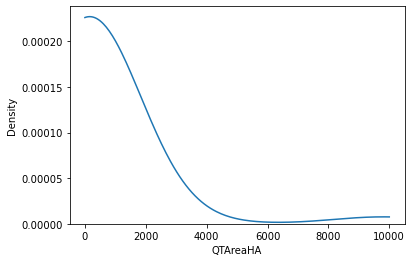

In [45]:
sns.kdeplot(data=df, x='QTAreaHA', cut=0, bw_adjust=3)#Plotzinho sobre a distruição dos dados de área

### Como acordado na reunião de 28/02/2023, vou produzir dados para q80 (ou seja, os top 20%)

In [136]:
df.query('QTAreaHA>330.860').drop_duplicates('QTAreaHA').to_excel('Processos_garimpo_filtrados_VERSAO2.xlsx')

### Criando uma planilha de acompanhamento / pesquisa

In [48]:
df_consulta = df[['DSProcesso','Pessoa','Pessoa_NOME','TipoRelacao']]
df_consulta.to_excel('Colsulta.xlsx')

## Baseado na conversa de 02/03/2023, o escopo da análise mudou um pouco:
* Utilizar base de dados incluindo os processos referentes ao período expandido;
* Levantar os processos de PLG para os Estados que englobam a Amazônia Legal: Acre, Pará, Amazonas, Roraima, Rondônia, Amapá, Mato Grosso, Tocantins e Maranhão (siglas para busca:RR, AM, AP, PA, MA, TO, MT, RO, AC).
* Primeiro momento: buscar todos os processos de PLG que incluam a publicação de PLG para os estados listados (ou seja, que supostamente autoriza publicamente a Lavra Garimpeira). Os marcadores de busca de eventos devem ser o 333 e o 513.
* Segundo momento: buscar, para todos os estados listados, os processos de PLG que incluam a publicação de PLG e que constem apresentação de Licença Ambiental no sistema. Os marcadores de busca de eventos devem ser o 333, o 1402 e o 513.
* Terceiro momento: comparar os números que retornam dessas buscas para verificar se há a publicação de PLGs em processos em que não foram apresentadas as licenças.
* Ranquear os processos para cada estado de acordo com a área, para verificar quais padrões de distribuição de processos/área ocorrem na região como um todo e nos estados individualmente. 
* Ranquear por área para ver se há concentração geográfica das maiores áreas e se há destaque para algum estado.
* Após determinação de quartis para análise, se forem observados padrões semelhantes, podemos verificar se o sigilo se repete também para outros estados.
* Verificação do padrão de distribuição dos processos com maiores áreas em relação às cooperativas, comparando o ranqueamento com os múltiplos pedidos realizados pelos mesmos grupos.
* Verificação do aumento/diminuição de pedidos ao longo do período por estado e para toda a região (linhas do tempo da quantidade dos processos).
* Verificação do tempo (talvez olhar a média) de tramitação entre pedido e publicação para os processos (eventos 333 e 513).
* Verificação do tempo de tramitação entre o pedido e a apresentação de licença (eventos 333 e 1402).
* Verificação do tempo de tramitação entre a apresentação de licença e a publicação da PLG (eventos 1402 e 513).


In [1]:
#Importando Pacotes
import pandas as pd
import numpy as np
from collections import ChainMap
pd.set_option('display.max_columns', None)

In [2]:
#Lendo as planilhas:
processo_sub = pd.read_table('ProcessoSubstancia.csv', sep=',')
processo = pd.read_table("Processo.csv", sep=',')
evento = pd.read_table("ProcessoEvento.csv", sep=',')
mun = pd.read_table("ProcessoMunicipio.csv", sep=',')
pessoa = pd.read_table("ProcessoPessoa.csv", sep=',')

C:\Users\User\AppData\Local\Temp\ipykernel_8368\556860945.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pessoa = pd.read_table("ProcessoPessoa.csv", sep=',')


### Vamos iniciar a análise filtrando os processos que estão nos estados da amaz. legal. Para isso, vamos usar a base de municípios!

In [3]:
del mun['Unnamed: 0']
amaz_lgl = mun.query('UF=="AC" | UF=="AM" | UF=="RR" | UF=="RO" | UF=="MT" | UF=="PA" | UF=="AP" | UF=="MA" | UF=="TO"')
f'O Estados que compõem essa base amaz_lgl são:{amaz_lgl.UF.unique()}'

"O Estados que compõem essa base amaz_lgl são:['RR' 'MT' 'PA' 'RO' 'AM' 'AP' 'MA' 'TO' 'AC']"

In [4]:
amaz_lgl.head(5)#Vendo as 5 primeiras linhas

,DSProcesso,IDMunicipio,Municipios,UF
0,884.029/2020,1400175,CANTÁ,RR
1,884.029/2021,1400159,BONFIM,RR
2,884.029/2022,1400027,AMAJARI,RR
3,884.030/1996,1400902,SÃO LUIZ DO ANAUÁ,RR
4,884.030/1997,1400902,SÃO LUIZ DO ANAUÁ,RR


Agora sim vamos iniciar o merge com a base de dados de processos! E vamos filtrar por processos ativos!

In [5]:
del processo['Unnamed: 0']
processo_amazlgl = processo.merge(amaz_lgl,on='DSProcesso',how='inner')
processo_amazlgl_ativos = processo_amazlgl.query("BTAtivo=='S'")
processo_amazlgl_ativos.head()

,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,DTProtocolo,DTPrioridade,QTAreaHA,Tipo_Requerimento,Fase_Processo,Unidade_ADM,Unidade_Protocolizadora,IDMunicipio,Municipios,UF
11,850.308/1991,850308,1991,S,27205.850308/1991-15,1.0,1,5,27205.0,1991-05-07 00:00:00,1991-05-07 00:00:00,"992,25",Requerimento de Autorização de Pesquisa,Requerimento de Pesquisa,Gerência Regional / PA,Unid. Protocolizadora 5,1507508,SÃO JOÃO DO ARAGUAIA,PA
14,850.308/1994,850308,1994,S,27205.850308/1994-68,2.0,5,5,27205.0,1994-01-14 00:00:00,1994-01-14 00:00:00,"50,00",Requerimento de Lavra Garimpeira,Requerimento de Lavra Garimpeira,Gerência Regional / PA,Unid. Protocolizadora 5,1503606,ITAITUBA,PA
21,850.308/2001,850308,2001,S,27205.850308/2001-48,1.0,3,5,27205.0,2001-08-03 00:00:00,2001-08-03 00:00:00,"3525,40",Requerimento de Autorização de Pesquisa,Requerimento de Lavra,Gerência Regional / PA,Unid. Protocolizadora 5,1508126,ULIANÓPOLIS,PA
23,850.308/2003,850308,2003,S,27205.850308/2003-18,1.0,2,5,27205.0,2003-07-14 00:00:00,2003-07-14 00:00:00,"1542,64",Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,Gerência Regional / PA,Unid. Protocolizadora 5,1505064,NOVO REPARTIMENTO,PA
26,850.308/2006,850308,2006,S,48405.850308/2006-76,1.0,2,5,48405.0,2006-05-18 16:56:00,2006-05-18 16:56:00,"9337,05",Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,Gerência Regional / PA,PARÁ,1505502,PARAGOMINAS,PA


Ficou acordado que vamos retroceder um pouco na análise no tempo. Vamos pegar processos de 2015 até 2022. Seguindo o comentário da Gaia, vamos também dar uma atenção maior aos processos que foram autorizados em 2023. Portanto, nós queremos apenas processos da data de 2015-2022 e também que passaram por autorização anterior a 2023!Ah, alem de ser para ouro, é claro

In [6]:
ouro = processo_sub.query('Substancia.str.contains("OURO")',engine='python')
processo_amazlgl_ativos_ouro = processo_amazlgl_ativos.merge(ouro,on='DSProcesso',how='inner')
processo_amazlgl_ativos_ouro = processo_amazlgl_ativos_ouro.query('NRAnoProcesso >= 2015 & NRAnoProcesso < 2023')#Retendo processos entre 2015 e 2022
#Vamos deletar colunas que não sao importantes para nossa análise:
colunas_keep =['DSProcesso' ,'NRProcesso','NRAnoProcesso','NRNUP','IDTipoRequerimento','IDFaseProcesso','QTAreaHA','Tipo_Requerimento','Fase_Processo','Municipios','UF','Substancia',
               'Tipo_Uso_Substancia']
processo_amazlgl_ativos_ouro = processo_amazlgl_ativos_ouro[colunas_keep]
processo_amazlgl_ativos_ouro.head()

,DSProcesso,NRProcesso,NRAnoProcesso,NRNUP,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia
4,850.308/2017,850308,2017,48405.850308/2017-29,2.0,5,"49,66",Requerimento de Lavra Garimpeira,Requerimento de Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial
5,850.308/2018,850308,2018,48405.850308/2018-18,2.0,5,"48,72",Requerimento de Lavra Garimpeira,Requerimento de Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial
6,850.308/2020,850308,2020,48059.850308/2020-10,2.0,5,"8687,90",Requerimento de Lavra Garimpeira,Requerimento de Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial
7,850.308/2021,850308,2021,48059.850308/2021-92,1.0,1,"352,58",Requerimento de Autorização de Pesquisa,Requerimento de Pesquisa,BRASIL NOVO,PA,OURO,Industrial
2814,806.001/2015,806001,2015,48422.806001/2015-11,1.0,2,"2372,15",Requerimento de Autorização de Pesquisa,Autorização de Pesquisa,CACHOEIRA DO PIRIÁ,PA,MINÉRIO DE OURO,Industrial


In [7]:
#Check das substânticas
sub = processo_amazlgl_ativos_ouro['Substancia'].unique()
f' Os tipos de substâncias nos processos filtrados são: {sub}'

" Os tipos de substâncias nos processos filtrados são: ['MINÉRIO DE OURO' 'OURO' 'OURO NATIVO']"

In [8]:
#Check de estados:

f' Os estados nos processos filtrados são: {processo_amazlgl_ativos_ouro.UF.unique()}'

" Os estados nos processos filtrados são: ['PA' 'MA' 'TO' 'AM' 'MT' 'AP' 'RO' 'RR' 'AC']"

Beleza, nós já temos nossa base de dados para os estados da amazonia legal, para os anos de 2015 ate 22 e para as substâncias de ouro

Primeiro momento: buscar todos os processos de PLG que incluam a publicação de PLG para os estados listados (ou seja, que supostamente autoriza publicamente a Lavra Garimpeira). Os marcadores de busca de eventos devem ser o 333 e o 513.

In [9]:
#Célula do codigo para filtrar os processos que são 333 e 513.
evento_333 = evento.query('IDEvento==333')
evento_513 = evento.query('IDEvento==513')
evento_333_513 = evento_333.merge(evento_513,on='DSProcesso',how='inner')
colunas_keep =['DSProcesso' ,'IDEvento_x','DTEvento_x','Evento__x','IDEvento_y','DTEvento_y','Evento__y']
evento_333_513 = evento_333_513[colunas_keep]
nome_colunas={'IDEvento_x':'IDEvento_333','DTEvento_x':'DTEvento_333','Evento__x':'Evento_333','IDEvento_y':'IDEvento_513','DTEvento_y':'DTEvento_513','Evento__y':'Evento_513'}
evento_333_513.rename(columns=nome_colunas,
          inplace=True)
evento_333_513
processo_amzlgl_ativos_ouro_333_513 = processo_amazlgl_ativos_ouro.merge(evento_333_513,on='DSProcesso',how='inner')
processo_amzlgl_ativos_ouro_333_513.head()

,DSProcesso,NRProcesso,NRAnoProcesso,NRNUP,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_513,DTEvento_513,Evento_513
0,806.127/2015,806127,2015,48422.806127/2015-95,24.0,6,"600,01",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,CÂNDIDO MENDES,MA,MINÉRIO DE OURO,Industrial,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,806.127/2015,806127,2015,48422.806127/2015-95,24.0,6,"600,01",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,TURIAÇU,MA,MINÉRIO DE OURO,Industrial,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
2,850.002/2020,850002,2020,48059.850002/2020-55,24.0,6,"15,82",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.004/2017,850004,2017,48405.850004/2017-61,2.0,6,"1753,79",Requerimento de Lavra Garimpeira,Lavra Garimpeira,OURILÂNDIA DO NORTE,PA,MINÉRIO DE OURO,Industrial,333,2017-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-07-14,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.004/2017,850004,2017,48405.850004/2017-61,2.0,6,"1753,79",Requerimento de Lavra Garimpeira,Lavra Garimpeira,TUCUMÃ,PA,MINÉRIO DE OURO,Industrial,333,2017-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-07-14,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


In [10]:
#check Estados:

f' Os estados nos processos filtrados são: {processo_amzlgl_ativos_ouro_333_513.UF.unique()}'

" Os estados nos processos filtrados são: ['MA' 'PA' 'AP' 'TO' 'MT' 'RR' 'RO']"

In [11]:
#Temos processos repetidos
processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513['DSProcesso'].duplicated()]#86 processos repetidos

,DSProcesso,NRProcesso,NRAnoProcesso,NRNUP,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_513,DTEvento_513,Evento_513
1,806.127/2015,806127,2015,48422.806127/2015-95,24.0,6,"600,01",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,TURIAÇU,MA,MINÉRIO DE OURO,Industrial,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.004/2017,850004,2017,48405.850004/2017-61,2.0,6,"1753,79",Requerimento de Lavra Garimpeira,Lavra Garimpeira,TUCUMÃ,PA,MINÉRIO DE OURO,Industrial,333,2017-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-07-14,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
54,850.091/2016,850091,2016,48405.850091/2016-76,2.0,6,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2016-03-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2017-06-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
60,850.101/2015,850101,2015,48405.850101/2015-92,2.0,6,"9917,91",Requerimento de Lavra Garimpeira,Lavra Garimpeira,RURÓPOLIS,PA,MINÉRIO DE OURO,Industrial,333,2015-02-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2019-06-12,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
96,850.227/2017,850227,2017,48405.850227/2017-29,2.0,6,"9,48",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2017-03-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2017-09-20,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,867.092/2019,867092,2019,48068.867092/2019-71,2.0,6,"31,15",Requerimento de Lavra Garimpeira,Lavra Garimpeira,TERRA NOVA DO NORTE,MT,MINÉRIO DE OURO,Industrial,333,2019-11-22,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-09-24,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
875,867.101/2019,867101,2019,48068.867101/2019-23,2.0,6,"15,03",Requerimento de Lavra Garimpeira,Lavra Garimpeira,TERRA NOVA DO NORTE,MT,MINÉRIO DE OURO,Industrial,333,2019-11-25,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-09-24,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
879,867.141/2021,867141,2021,48068.867141/2021-90,2.0,6,"9894,59",Requerimento de Lavra Garimpeira,Lavra Garimpeira,NOVA SANTA HELENA,MT,MINÉRIO DE OURO,Industrial,333,2021-08-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-05-19,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
881,867.174/2017,867174,2017,48412.867174/2017-96,2.0,6,"41,39",Requerimento de Lavra Garimpeira,Lavra Garimpeira,PEIXOTO DE AZEVEDO,MT,MINÉRIO DE OURO,Industrial,333,2017-10-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-09-24,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


Analisando no Arcgis, comparando a malha espacial dos projetos de mineração com malha municipal, percebi que os processo repetidos, eles são  pois o mesmo processo cruza 2 municipios. Portanto, não podemos reter um processo visto que ele contem infos relevantes. FOI ACORDADO, EM REUNIÃO, NO DIA 07/03/2023 QUE PARA FINS DA ANÁLISE JURIDICA DO PROJETO NÃO OLHAREMOS COMO PROCESSOS SEPARADOS ESSES QUE CRUZAM MAIS DE UM MUNICÍPIO. VAMOS CRIAR SIM UM DATAFRAME SEPARADO PARA TÍTULO DE ORGANIZAÇÃO MAS A ANALISE FINAL SERA COM TODOS!!!

In [12]:
repetidos = processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513["DSProcesso"].isin(processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513['DSProcesso'].duplicated()]['DSProcesso'])]
repetidos.to_csv('processos_multimunicipais.csv')

Essa linha abaixo é apenas um exemplo de processos que foram pedidos muito no passado e foram aprovados recentemente. Info interessante para projetos futuros

In [12]:
#Evidência de processos antigos que foram aprovados recentemente!
evento_333_513.query('DSProcesso=="650.677/1999" | DSProcesso=="650.004/2000" |DSProcesso=="650.005/2000" | DSProcesso=="650.692/1999" | DSProcesso=="50.682/1999" | DSProcesso=="50.683/1999"')

,DSProcesso,IDEvento_333,DTEvento_333,Evento_333,IDEvento_513,DTEvento_513,Evento_513
0,650.004/2000,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,650.005/2000,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
8,650.677/1999,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-08-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
12,650.692/1999,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-08-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


Vamos agora, filtrar na nossa base principal os processos que não cruzam mais de um município. Para isso vamos reter os processos que não fazem parte da query: processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513["DSProcesso"].isin(processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513['DSProcesso'].duplicated()]['DSProcesso'])]

* Ignorar esse passo pois foi acordado que usaremos tudo. Portanto todas essas linhas de código eu irei botar um comentario (#) para inutiliza-las

In [36]:
#processo_amzlgl_ativos_ouro_333_513_norep = processo_amzlgl_ativos_ouro_333_513[-processo_amzlgl_ativos_ouro_333_513['DSProcesso'].isin(processo_amzlgl_ativos_ouro_333_513[processo_amzlgl_ativos_ouro_333_513['DSProcesso'].duplicated()]['DSProcesso'])]
#processo_amzlgl_ativos_ouro_333_513_norep


##### Criando a base de dados de processos de mineração únicos!

In [13]:
processo_amzlgl_ativos_ouro_333_513_unique = processo_amzlgl_ativos_ouro_333_513.drop_duplicates(subset='DSProcesso')
#Check quantidade de registros antes e depois de "dropar" os duplicados:
f'A quantidade de processos (linhas) na nossa base antes de tirar os duplicados eram de {processo_amzlgl_ativos_ouro_333_513.shape[0]} e depois de tirar foi para {processo_amzlgl_ativos_ouro_333_513_unique.shape[0]}'

'A quantidade de processos (linhas) na nossa base antes de tirar os duplicados eram de 920 e depois de tirar foi para 834'

O primeiro passo já foi feito, que era de : 
* Primeiro momento: buscar todos os processos de PLG que incluam a publicação de PLG para os estados listados (ou seja, que supostamente autoriza publicamente a Lavra Garimpeira). Os marcadores de busca de eventos devem ser o 333 e o 513.

Agora, vamos para o segundo passo:
* Segundo momento: buscar, para todos os estados listados, os processos de PLG que incluam a publicação de PLG e que constem apresentação de Licença Ambiental no sistema. Os marcadores de busca de eventos devem ser o 333, o 1402 e o 513.



In [14]:
processo_amzlgl_ativos_ouro_333_513_unique # Essa é a base que tem o 333 para o 513
#Vamos filtrar agora os que, no meio dos trâmites, apresentaram licença ambiental:
#Pegando marcador 1402
evento_1402 = evento.query('IDEvento==1402')
processo_amzlgl_ativos_ouro_333_513_unique_1402= processo_amzlgl_ativos_ouro_333_513_unique.merge(evento_1402,on='DSProcesso',how='inner')
processo_amzlgl_ativos_ouro_333_513_unique_1402
colunas_keep =['DSProcesso' ,'NRAnoProcesso','IDTipoRequerimento','IDFaseProcesso','QTAreaHA','Tipo_Requerimento','Fase_Processo','Municipios',
              'UF','Substancia','Tipo_Uso_Substancia','IDEvento_333','DTEvento_333','Evento_333','IDEvento','DTEvento','Evento_','IDEvento_513','DTEvento_513','Evento_513']
processo_amzlgl_ativos_ouro_333_513_unique_1402 = processo_amzlgl_ativos_ouro_333_513_unique_1402[colunas_keep]
nome_colunas={'IDEvento':'IDEvento_1402','DTEvento':'DTEvento_1402','Evento_':'Evento_1402'}
processo_amzlgl_ativos_ouro_333_513_unique_1402.rename(columns=nome_colunas,
          inplace=True)
processo_amzlgl_ativos_ouro_333_513_unique_1402

,DSProcesso,NRAnoProcesso,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_1402,DTEvento_1402,Evento_1402,IDEvento_513,DTEvento_513,Evento_513
0,806.127/2015,2015,24.0,6,"600,01",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,CÂNDIDO MENDES,MA,MINÉRIO DE OURO,Industrial,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-02-16,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1,850.002/2020,2020,24.0,6,"15,82",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-02,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-03-27,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
2,850.004/2017,2017,2.0,6,"1753,79",Requerimento de Lavra Garimpeira,Lavra Garimpeira,OURILÂNDIA DO NORTE,PA,MINÉRIO DE OURO,Industrial,333,2017-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-07,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-07-14,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
3,850.004/2020,2020,2.0,6,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-22,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
4,850.006/2017,2017,2.0,6,"117,98",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2017-01-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-09-18,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2019-04-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,886.246/2018,2018,2.0,6,"9,60",Requerimento de Lavra Garimpeira,Lavra Garimpeira,PORTO VELHO,RO,MINÉRIO DE OURO,Industrial,333,2018-11-29,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2019-05-21,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-11-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
999,850.949/2016,2016,2.0,6,"47,25",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2016-11-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-05-07,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2018-08-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1000,866.953/2018,2018,2.0,6,"1,60",Requerimento de Lavra Garimpeira,Lavra Garimpeira,POCONÉ,MT,MINÉRIO DE OURO,Industrial,333,2018-11-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-17,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-09-24,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
1001,850.992/2019,2019,2.0,6,"3135,01",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2019-12-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-27,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-11-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


In [15]:
#Analisando os processos repetidos depois desse merge!
processo_amzlgl_ativos_ouro_333_513_unique_1402[processo_amzlgl_ativos_ouro_333_513_unique_1402.DSProcesso.duplicated()]

#Ao pegar alguns exemplos de processos repetidos pude observar, analisando esses processos direto no site da ANM, que um mesmo processo "pediu" 2x ou mais o evento 1402 pois entre um pedido de 1402 e outro, ele teve outros eventos (que não estão vislumbrados em nossa análise)


,DSProcesso,NRAnoProcesso,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_1402,DTEvento_1402,Evento_1402,IDEvento_513,DTEvento_513,Evento_513
32,850.062/2021,2021,2.0,6,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2021-01-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-08-09,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-10-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
34,850.063/2021,2021,2.0,6,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2021-01-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-08-09,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-10-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
78,850.183/2018,2018,2.0,6,"49,30",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2018-03-06,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-03-16,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-09-08,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
79,850.183/2018,2018,2.0,6,"49,30",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2018-03-06,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-04-09,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-09-08,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
87,850.206/2019,2019,2.0,6,"50,00",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2019-04-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2019-12-17,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-02-12,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,867.300/2020,2020,24.0,6,"19,56",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,NOSSA SENHORA DO LIVRAMENTO,MT,MINÉRIO DE OURO,Industrial,333,2020-12-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-11-29,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-05-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
974,867.301/2020,2020,24.0,6,"17,92",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,NOSSA SENHORA DO LIVRAMENTO,MT,MINÉRIO DE OURO,Industrial,333,2020-12-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2021-11-29,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-05-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
986,867.372/2021,2021,2.0,6,"29,34",Requerimento de Lavra Garimpeira,Lavra Garimpeira,NOVO MUNDO,MT,MINÉRIO DE OURO,Industrial,333,2021-10-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-04-27,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-08-22,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
996,884.033/2020,2020,2.0,6,"48,69",Requerimento de Lavra Garimpeira,Lavra Garimpeira,CARACARAÍ,RR,MINÉRIO DE OURO,Industrial,333,2020-05-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2022-07-27,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2022-08-19,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


Baseado na célula acima, vamos reter apenas os processos unicos em que o evento 1402 é o mais recente:

In [15]:
df_final = processo_amzlgl_ativos_ouro_333_513_unique_1402.drop_duplicates(subset='DSProcesso')
df_final
f'Antes de reter os processos únicos nós tinhamos {processo_amzlgl_ativos_ouro_333_513_unique_1402.shape[0]} processos e depois passamos a ter {df_final.shape[0]}'

'Antes de reter os processos únicos nós tinhamos 1003 processos e depois passamos a ter 822'

Como nós filtramos processos que chegaram até o evento 513, iniciando pelo 333 e que passa OU NÃO pelo 1402, a base final pode haver conflito de dados. Esse conflito se da muito parecido como uma operação de conjuntos(figura abaixo). Para a base final, os processos que tem o marcador 513 CONTEM os processos que tem o marcador 1402 e 513. Em outras palavras, os processos 1402 estão contidos no 513. Dessa maneira, vou filtrar da base final (df_final) os processos que não CONTEM o 1402, que seria toda a área do conjunto hachurada(figura 2). PS:IGNORAR MEUS DOTES ARTÍSTICOS


![ImagemContem](https://github.com/EduMinsky/Projeto_Garimpo_CPI/blob/main/asd.png?raw=true)


![ImagemContem](https://github.com/EduMinsky/Projeto_Garimpo_CPI/blob/main/asd222.png?raw=true)



In [16]:
processos_sem1402 = processo_amzlgl_ativos_ouro_333_513_unique[-processo_amzlgl_ativos_ouro_333_513_unique["DSProcesso"].isin(df_final.DSProcesso)]
processos_sem1402#12 PROCESSOS

,DSProcesso,NRProcesso,NRAnoProcesso,NRNUP,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_513,DTEvento_513,Evento_513
420,850.956/2020,850956,2020,48059.850956/2020-68,24.0,6,"47,54",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-02-21,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
423,850.959/2020,850959,2020,48059.850959/2020-00,24.0,6,"48,79",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-02-21,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
426,850.961/2020,850961,2020,48059.850961/2020-71,24.0,6,"49,19",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-10-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
427,850.963/2020,850963,2020,48059.850963/2020-60,24.0,6,"49,46",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-10-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
428,850.964/2020,850964,2020,48059.850964/2020-12,24.0,6,"49,15",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-10-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
501,851.346/2017,851346,2017,48405.851346/2017-07,2.0,6,"96,77",Requerimento de Lavra Garimpeira,Lavra Garimpeira,NOVO PROGRESSO,PA,MINÉRIO DE OURO,Industrial,333,2017-12-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2019-07-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
506,851.393/2021,851393,2021,48059.851393/2021-14,2.0,6,"17,02",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2021-08-24,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-05-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
528,864.259/2015,864259,2015,48417.864259/2015-19,2.0,6,"28,92",Requerimento de Lavra Garimpeira,Lavra Garimpeira,BOM JESUS DO TOCANTINS,TO,MINÉRIO DE OURO,Industrial,333,2015-10-06,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2017-11-30,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
588,866.106/2015,866106,2015,48412.866106/2015-48,25.0,6,"252,85",Requerimento de Disponibilidade para Lavra Gar...,Lavra Garimpeira,PEIXOTO DE AZEVEDO,MT,MINÉRIO DE OURO,Industrial,333,2015-02-26,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-10-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL
710,866.466/2015,866466,2015,48412.866466/2015-40,2.0,6,"135,73",Requerimento de Lavra Garimpeira,Lavra Garimpeira,MATUPÁ,MT,MINÉRIO DE OURO,Industrial,333,2015-09-16,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-11-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL


# Beleza, nós temos os processos que foram de 333 para 1402 até 513 (df_final) e os processos que foram de 333 para 513 sem passar pelo 1402 (processos_sem1402).


As linhas abaixo estão comentadas pois se trata dos processos que ocorrem em mais de um município. Não vamos tratar disso agora!

In [59]:
#Como são muitos processos para os repetidos, eu vou criar uma planilha de consulta para ver quais os municipios esses processos ficam:
#consulta_multimunicipais = repetidos['DSProcesso']
#consulta_multimunicipais.to_csv('consulta_multimunicipais.csv')

Vamos agora analizar os processo repetidos que tem 1402 e que nao tem 1402!

In [61]:
#multimun_unique = repetidos.drop_duplicates('DSProcesso')
#evento_1402 = evento.query('IDEvento==1402')

#multimun_unique_1402= multimun_unique.merge(evento_1402,on='DSProcesso',how='inner')

#colunas_keep =['DSProcesso' ,'NRAnoProcesso','IDTipoRequerimento','IDFaseProcesso','QTAreaHA','Tipo_Requerimento','Fase_Processo','Municipios',
              #'UF','Substancia','Tipo_Uso_Substancia','IDEvento_333','DTEvento_333','Evento_333','IDEvento','DTEvento','Evento_','IDEvento_513','DTEvento_513','Evento_513']
#multimun_unique_1402 = multimun_unique_1402[colunas_keep]
#nome_colunas={'IDEvento':'IDEvento_1402','DTEvento':'DTEvento_1402','Evento_':'Evento_1402'}
#multimun_unique_1402.rename(columns=nome_colunas,
          #inplace=True)
#multimun_unique_1402[multimun_unique_1402['DSProcesso'].duplicated()]
#Ao pegar alguns exemplos de processos repetidos pude observar, analisando esses processos direto no site da ANM, que um mesmo processo "pediu" 2x o evento 1402 pois entre um pedido de 1402 e outro, ele teve outros eventos (que não estão vislumbrados em nossa análise)

Partindo da metodologia aplicada nas células anteriores, vou reter os eventos 1402 mais recentes!

In [62]:
#df_final_multimunicipal = multimun_unique_1402.drop_duplicates(subset='DSProcesso')
#df_final_multimunicipal
#75 processos

In [63]:
#multimunicipal_sem1402 = multimun_unique[-multimun_unique["DSProcesso"].isin(df_final_multimunicipal.DSProcesso)]
#multimunicipal_sem1402#2 processos


# Terminamos nossa criação de dataframes: Ao todo nós  temos:
* df_final -> Processos unicos que tem os eventos 333, 1402 e 513 
* processos_sem1402 -> Processos unicos que tem os eventos 333 e 513 


Agora vamos unir esses processos as pessoas e dropar os duplicados!

In [17]:
df_final_pessoa = df_final.merge(pessoa,on='DSProcesso',how='inner')

processos_sem1402_pessoa = processos_sem1402.merge(pessoa,on='DSProcesso',how='inner')



Separando em PJ e PF

In [18]:
df_final_pessoa_pj = df_final_pessoa.query('Pessoa =="J"')
df_final_pessoa_pf = df_final_pessoa.query('Pessoa =="F"')


processos_sem1402_pessoa_pj = processos_sem1402_pessoa.query('Pessoa =="J"')
processos_sem1402_pessoa_pf = processos_sem1402_pessoa.query('Pessoa =="F"')


In [19]:
#Retendo processos unicos e uni-los novamente:
df_final_pessoa_pj_unique = df_final_pessoa_pj.drop_duplicates(subset='DSProcesso')
df_final_pessoa_pj_unique

df_final_pessoa_pf_unique = df_final_pessoa_pf.drop_duplicates(subset='DSProcesso')
df_final_pessoa_pf_unique

df_final_concat =  pd.concat([df_final_pessoa_pj_unique, df_final_pessoa_pf_unique])
df_final_concat.drop_duplicates(subset='DSProcesso',inplace=True)
df_final_concat


processos_sem1402_final_concat =  pd.concat([processos_sem1402_pessoa_pj, processos_sem1402_pessoa_pf])
processos_sem1402_final_concat.drop_duplicates(subset='DSProcesso',inplace=True)
processos_sem1402_final_concat

,DSProcesso,NRProcesso,NRAnoProcesso,NRNUP,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_513,DTEvento_513,Evento_513,Unnamed: 0,IDPessoa,IDTipoRelacao,IDTipoResponsabilidadeTecnica,IDTipoRepresentacaoLegal,DTPrazoArrendamento,DTInicioVigencia,DTFimVigencia,Pessoa,Pessoa_NOME,TipoRelacao,Responsa_tecnica,Representacao_Legal
16,851.346/2017,851346,2017,48405.851346/2017-07,2.0,6,"96,77",Requerimento de Lavra Garimpeira,Lavra Garimpeira,NOVO PROGRESSO,PA,MINÉRIO DE OURO,Industrial,333,2017-12-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2019-07-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1175554,8951064,1,NaN,NaN,NaN,2017-12-11,NaN,J,Cooperminerios Cooper. Mista de Exp. Mineral e...,Titular\Requerente,NaN,NaN
20,851.393/2021,851393,2021,48059.851393/2021-14,2.0,6,"17,02",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2021-08-24,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-05-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1177519,9023779,1,0.0,NaN,NaN,2021-08-24,NaN,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente,NaN,NaN
22,864.259/2015,864259,2015,48417.864259/2015-19,2.0,6,"28,92",Requerimento de Lavra Garimpeira,Lavra Garimpeira,BOM JESUS DO TOCANTINS,TO,MINÉRIO DE OURO,Industrial,333,2015-10-06,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2017-11-30,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1459074,8972714,1,NaN,NaN,NaN,2015-10-06,NaN,J,A V CORDEIRO - ME,Titular\Requerente,NaN,NaN
24,866.106/2015,866106,2015,48412.866106/2015-48,25.0,6,"252,85",Requerimento de Disponibilidade para Lavra Gar...,Lavra Garimpeira,PEIXOTO DE AZEVEDO,MT,MINÉRIO DE OURO,Industrial,333,2015-02-26,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-10-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1485453,8921648,1,NaN,NaN,NaN,2015-02-26,NaN,J,COOPERATIVA DOS GARIMPEIROS DO VALE DO RIO PEI...,Titular\Requerente,NaN,NaN
27,866.466/2015,866466,2015,48412.866466/2015-40,2.0,6,"135,73",Requerimento de Lavra Garimpeira,Lavra Garimpeira,MATUPÁ,MT,MINÉRIO DE OURO,Industrial,333,2015-09-16,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2021-11-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1520516,8921648,1,NaN,NaN,NaN,2015-09-16,NaN,J,COOPERATIVA DOS GARIMPEIROS DO VALE DO RIO PEI...,Titular\Requerente,NaN,NaN
33,867.551/2021,867551,2021,48068.867551/2021-31,2.0,6,"29,27",Requerimento de Lavra Garimpeira,Lavra Garimpeira,TERRA NOVA DO NORTE,MT,MINÉRIO DE OURO,Industrial,333,2021-11-25,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-09-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1575854,8921648,1,0.0,NaN,NaN,2021-11-25,NaN,J,COOPERATIVA DOS GARIMPEIROS DO VALE DO RIO PEI...,Titular\Requerente,NaN,NaN
0,850.956/2020,850956,2020,48059.850956/2020-68,24.0,6,"47,54",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-02-21,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1154715,113825,9,0.0,NaN,NaN,2020-08-10,NaN,F,WAGNER LOPES GHELER,Responsável Técnico,NaN,NaN
3,850.959/2020,850959,2020,48059.850959/2020-00,24.0,6,"48,79",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-02-21,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1154939,113825,9,0.0,NaN,NaN,2020-08-10,NaN,F,WAGNER LOPES GHELER,Responsável Técnico,NaN,NaN
6,850.961/2020,850961,2020,48059.850961/2020-71,24.0,6,"49,19",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-08-10,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,513,2022-10-25,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1155083,113825,9,0.0,NaN,NaN,2020-08-10,NaN,F,WAGNER LOPES GHELER,Responsável Técnico,NaN,NaN
9,850.963/2020,850963,2020,48059.850963/2020-60,

In [23]:
#Salvando essa galera:
df_final_concat.to_csv('db_333_1402_513_uniMUNI.csv')
processos_sem1402_final_concat.to_csv('db_333_513_uniMUNI.csv')
#df_final_multimunicipal_pessoa.to_csv('db_333_1402_513_multiMUNI.csv')
#multimunicipal_sem1402_pessoa.to_csv('db_333_513_multiMUNI.csv')
#Salvando tbm um arquivo de consulta para consultar os outros requerentes de um mesmo processo
consulta_pessoa = pessoa[['DSProcesso','Pessoa_NOME','Pessoa']]
consulta_pessoa.to_csv('consulta_pessoa.csv')

# Show de bola, agora vamos começar o processo de exploração de dados!!!

Terceiro momento: comparar os números que retornam dessas buscas para verificar se há a publicação de PLGs em processos em que não foram apresentadas as licenças.

In [21]:
#Processos que apresentaram licença:
f'Os processos que apresentaram licença foram:{df_final_concat.shape[0]} e os que não apresentam licença foram: {processos_sem1402_final_concat.shape[0]}'

'Os processos que apresentaram licença foram:822 e os que não apresentam licença foram: 12'

Quantos processos apresentaram licença para cada estado?
E quantos não apresentaram?

In [25]:
#Apresentaram processo para cada estado:
df_final_concat.groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='UF',aggfunc="count"))

,count_col
UF,
AP,3
MA,1
MT,314
PA,492
RO,2
RR,1
TO,9


In [26]:
#Não Apresentaram processo para cada estado:
processos_sem1402_final_concat.groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='UF',aggfunc="count"))

,count_col
UF,
MT,4
PA,7
TO,1


* Ranquear os processos para cada estado de acordo com a área, para verificar quais padrões de distribuição de processos/área ocorrem na região como um todo e nos estados individualmente.
* Ranquear por área para ver se há concentração geográfica das maiores áreas e se há destaque para algum estado.

In [20]:
#PAssando as colunas de area de string para number
df_final_concat['QTAreaHA']=df_final_concat['QTAreaHA'].str.replace(',', '.').astype(float)

processos_sem1402_final_concat['QTAreaHA']=processos_sem1402_final_concat['QTAreaHA'].str.replace(',', '.').astype(float)



In [28]:
df_final_concat.groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='QTAreaHA',aggfunc="sum"))

,count_col
UF,
AP,149.85
MA,600.01
MT,327325.14
PA,145311.57
RO,23.96
RR,48.69
TO,413.09


In [29]:
processos_sem1402_final_concat.groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='QTAreaHA',aggfunc="sum"))

,count_col
UF,
MT,467.65
PA,357.92
TO,28.92


Analisando quantils:


In [30]:
#Vamos achar a mediana da área, min e max e média:
median_df = df_final_concat['QTAreaHA'].median()
min_df = df_final_concat['QTAreaHA'].min()
max_df = df_final_concat['QTAreaHA'].max()
mean_df = df_final_concat['QTAreaHA'].mean()

df_sem1402_median = processos_sem1402_final_concat['QTAreaHA'].median()
df_sem1402_min = processos_sem1402_final_concat['QTAreaHA'].min()
df_sem1402_max = processos_sem1402_final_concat['QTAreaHA'].max()
df_sem1402_mean = processos_sem1402_final_concat['QTAreaHA'].mean()



In [31]:
f'A mediana da area dos processos que tem 1402  é:{median_df}, mínimo de {min_df},máximo de {max_df} e média de {mean_df}'

'A mediana da area dos processos que tem 1402  é:49.69, mínimo de 0.7,máximo de 10000.0 e média de 576.4869951338193'

In [32]:
f'A mediana da area dos processos que NÃO tem 1402 é:{df_sem1402_median}, mínimo de {df_sem1402_min},máximo de {df_sem1402_max} e média de {df_sem1402_mean}'

'A mediana da area dos processos que NÃO tem 1402 é:49.17, mínimo de 17.02,máximo de 252.85 e média de 71.2075'

In [33]:
#Vamos achar q1 q3 e q95 e q90 e q80
quantis_df_final = df_final_concat['QTAreaHA'].quantile([0.25,0.75,0.95,0.90,0.80])

quantis_sem1402_final = processos_sem1402_final_concat['QTAreaHA'].quantile([0.25,0.75,0.95,0.90,0.80])

In [34]:
f'Os quantils da area dos processos que tem 1402  são [0.25]{ df_final_concat["QTAreaHA"].quantile(0.25)}, [0.75]{df_final_concat["QTAreaHA"].quantile(0.75)}, [0.90]{df_final_concat["QTAreaHA"].quantile(0.90)},[0.95] {df_final_concat["QTAreaHA"].quantile(0.95)} e [0.80]{df_final_concat["QTAreaHA"].quantile(0.80)} '

'Os quantils da area dos processos que tem 1402  são [0.25]43.5925, [0.75]50.0, [0.90]541.0179999999996,[0.95] 5027.773999999994 e [0.80]99.89800000000002 '

In [35]:
f'Os quantils da area dos processos que NÃO tem 1402  são [0.25]{ processos_sem1402_final_concat["QTAreaHA"].quantile(0.25)}, [0.75]{processos_sem1402_final_concat["QTAreaHA"].quantile(0.75)}, [0.90]{processos_sem1402_final_concat["QTAreaHA"].quantile(0.90)},[0.95] {processos_sem1402_final_concat["QTAreaHA"].quantile(0.95)} e [0.80]{processos_sem1402_final_concat["QTAreaHA"].quantile(0.80)} '

'Os quantils da area dos processos que NÃO tem 1402  são [0.25]42.9725, [0.75]61.5425, [0.90]131.834,[0.95] 188.4339999999999 e [0.80]87.37600000000003 '

In [36]:
#Vendo quanto de área soma para os top 5% PARA TODOS OS ESTADOS DA AMAZ LEGAL e quantos processos são (SÃO OS QUE APRESENTAM LICENÇA - 1402):
df_final_concat.query('QTAreaHA>5027.773999999994')['QTAreaHA'].sum() #352,878.89 de soma de área
df_final_concat.query('QTAreaHA>5027.773999999994')['QTAreaHA'].count()#SÃO 42 PROCESSOS

#Vendo quanto de área soma para os restantes (95%) PARA TODOS OS ESTADOS DA AMAZ LEGAL e quantos processos são (SÃO OS QUE APRESENTAM LICENÇA - 1402):
df_final_concat.query('QTAreaHA<5027.773999999994')['QTAreaHA'].sum() #120,993.42 de soma de área
df_final_concat.query('QTAreaHA<5027.773999999994')['QTAreaHA'].count() # 780 processos

#Vendo quanto de área soma para os top 5% PARA TODOS OS ESTADOS DA AMAZ LEGAL e quantos processos são PARA OS QUE NÃO APRESENTAM LICENÇA:
processos_sem1402_final_concat.query('QTAreaHA>188.4339999999999')['QTAreaHA'].sum()#252.85 de área
processos_sem1402_final_concat.query('QTAreaHA>188.4339999999999')['QTAreaHA'].count() #um processo

#Vendo quanto de área somapara os restantes (95%) PARA TODOS OS ESTADOS DA AMAZ LEGAL e quantos processos são PARA OS QUE NÃO APRESENTAM LICENÇA:
processos_sem1402_final_concat.query('QTAreaHA<188.4339999999999')['QTAreaHA'].sum()#601.64 de área
processos_sem1402_final_concat.query('QTAreaHA<188.4339999999999')['QTAreaHA'].count() #11 processos

11

 Em relação a esses 5%, como eles se distribuem por estado

In [162]:
df_final_concat.query('QTAreaHA>5027.773999999994').groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='QTAreaHA',aggfunc="sum"))

,count_col
UF,
MT,275729.12
PA,77149.77


In [163]:
df_final_concat.query('QTAreaHA>5027.773999999994').groupby(by=['UF']).agg(count_col=pd.NamedAgg(column='DSProcesso',aggfunc="count"))

,count_col
UF,
MT,34
PA,8


## FICOU ACORDADO DE PASSAR 3 DATAFRAMES PARA A GAIA:
* UM CONTENDO AS INFOS APENAS DO PARÁ (ISSO JA TEM MAS VOU REFAZER SOMENTE PARA CONTROLE)
* UM PARA AMAZONIA LEGAL(SÓ IRÁ RETORNAR PROCESSOS DE PARA E MT, COMO VIMOS)
* UM APENAS PARA O MT

In [167]:
#Criando o dataframe para o Para de top 5%, 10% e 20%
#Primeiro vamos filtrar o que é Pará:
processos_para = df_final_concat.query('UF=="PA"')
#Calculando, agora, os quartis de 95,90 e 80:
quantis_para = processos_para['QTAreaHA'].quantile([0.95,0.90,0.80])
quantis_para

0.95    562.669
0.90    358.076
0.80     50.000
Name: QTAreaHA, dtype: float64

In [174]:
#Salvando esses databases para 95%:
processos_para.query("QTAreaHA>562.669").to_excel("DB_Para_95%.xlsx")
#Para 90%
processos_para.query("QTAreaHA>358.076").to_excel("DB_Para_90%.xlsx")
#Para 80%
processos_para.query("QTAreaHA>50.000").to_excel("DB_Para_80%.xlsx")

In [169]:
#Criando o dataframe para o MT de top 5%, 10% e 20%
#Primeiro vamos filtrar o que é MT:
processos_mt = df_final_concat.query('UF=="MT"')
#Calculando, agora, os quartis de 95,90 e 80:
quantis_mt = processos_mt['QTAreaHA'].quantile([0.95,0.90,0.80])
quantis_mt

0.95    8549.3905
0.90    5345.8340
0.80     309.4680
Name: QTAreaHA, dtype: float64

In [173]:
#Salvando esses databases para 95%:
processos_mt.query("QTAreaHA>8549.3905").to_excel("DB_MT_95%.xlsx")
#Para 90%
processos_mt.query("QTAreaHA>5345.8340").to_excel("DB_MT_90%.xlsx")
#Para 80%
processos_mt.query("QTAreaHA>309.4680").to_excel("DB_MT_80%.xlsx")

In [172]:
#Salvando para a planilha toda!!
#95%
df_final_concat.query("QTAreaHA>5027.773999999994").to_excel("DB_AMAZLGL_95%.xlsx")
#90%
df_final_concat.query("QTAreaHA>541.0179999999996").to_excel("DB_AMAZLGL_90%.xlsx")
#80%
df_final_concat.query("QTAreaHA>99.89800000000002").to_excel("DB_AMAZLGL_80%.xlsx")

CRIANDO AS MESMAS PLANILHAS MAS PARA OS PROCESSOS QUE NAO TEM O 1402

In [38]:
#Para o Pará
processos_para = processos_sem1402_final_concat.query('UF=="PA"')
#Calculando, agora, os quartis de 95,90 e 80:
quantis_para = processos_para['QTAreaHA'].quantile([0.95,0.90,0.80])
quantis_para


0.95    82.577
0.90    68.384
0.80    49.406
Name: QTAreaHA, dtype: float64

In [39]:
#Salvando esses databases para 95%:
processos_para.query("QTAreaHA>82.577").to_excel("DB_Para_SEM_1402_95%.xlsx")
#Para 90%
processos_para.query("QTAreaHA>68.384").to_excel("DB_Para_SEM_1402_90%.xlsx")
#Para 80%
processos_para.query("QTAreaHA>49.406").to_excel("DB_Para_SEM_1402_80%.xlsx")

In [40]:
#Criando o dataframe para o MT de top 5%, 10% e 20%
#Primeiro vamos filtrar o que é MT:
processos_mt = processos_sem1402_final_concat.query('UF=="MT"')
#Calculando, agora, os quartis de 95,90 e 80:
quantis_mt = processos_mt['QTAreaHA'].quantile([0.95,0.90,0.80])
quantis_mt

0.95    235.282
0.90    217.714
0.80    182.578
Name: QTAreaHA, dtype: float64

In [42]:
#Salvando esses databases para 95%:
processos_mt.query("QTAreaHA>235.282").to_excel("DB_MT_SEM_1402_95%.xlsx")
#Para 90%
processos_mt.query("QTAreaHA>217.714").to_excel("DB_MT_SEM_1402_90%.xlsx")
#Para 80%
processos_mt.query("QTAreaHA>182.578").to_excel("DB_MT_SEM_1402_80%.xlsx")

In [43]:
#Salvando para a planilha toda!!
#95%
processos_sem1402_final_concat.query("QTAreaHA>188.4339999999999").to_excel("DB_AMAZLGL_SEM_1402_95%.xlsx")
#90%
processos_sem1402_final_concat.query("QTAreaHA>131.834").to_excel("DB_AMAZLGL_SEM_1402_90%.xlsx")
#80%
processos_sem1402_final_concat.query("QTAreaHA>87.37600000000003").to_excel("DB_AMAZLGL_SEM_1402_80%.xlsx")

#### Explorando as maiores empresas de exploração no garimpo para a área de estudo

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
db_333_1402_513 = pd.read_csv('db_333_1402_513_uniMUNI.csv')
db_333_1402_513.head()

,Unnamed: 0.1,DSProcesso,NRAnoProcesso,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_1402,DTEvento_1402,Evento_1402,IDEvento_513,DTEvento_513,Evento_513,Unnamed: 0,IDPessoa,IDTipoRelacao,IDTipoResponsabilidadeTecnica,IDTipoRepresentacaoLegal,DTPrazoArrendamento,DTInicioVigencia,DTFimVigencia,Pessoa,Pessoa_NOME,TipoRelacao,Responsa_tecnica,Representacao_Legal
0,1,806.127/2015,2015,24.0,6,"600,01",Requerimento de Mudança de Regime para PLG,Lavra Garimpeira,CÂNDIDO MENDES,MA,MINÉRIO DE OURO,Industrial,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-02-16,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,206082,8988649,1,NaN,NaN,NaN,2015-09-15,NaN,J,Cooperativa de Mineração Minas do Brasil - Min...,Titular\Requerente,NaN,NaN
1,6,850.004/2017,2017,2.0,6,"1753,79",Requerimento de Lavra Garimpeira,Lavra Garimpeira,OURILÂNDIA DO NORTE,PA,MINÉRIO DE OURO,Industrial,333,2017-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-08-07,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2021-07-14,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1062425,8992344,1,NaN,NaN,NaN,2017-01-03,NaN,J,COOPERATIVA DE GARIMPEIROS E MINERADORES DE OU...,Titular\Requerente,NaN,NaN
2,10,850.004/2020,2020,2.0,6,"49,62",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-04-22,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-05-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1062435,9043887,1,NaN,NaN,NaN,2023-01-11,NaN,J,COOPER-ITA COOPERATIVA DOS GARIMPEIROS DE ITAI...,Titular\Requerente,NaN,NaN
3,13,850.006/2017,2017,2.0,6,"117,98",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2017-01-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-09-18,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2019-04-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1062640,8951064,4,NaN,NaN,NaN,2017-01-04,NaN,J,Cooperminerios Cooper. Mista de Exp. Mineral e...,Representante Legal,NaN,NaN
4,19,850.016/2016,2016,2.0,6,"190,71",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2016-01-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2016-09-21,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2016-10-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1063706,8966974,1,NaN,NaN,NaN,2016-01-15,NaN,J,COOPERATIVA MISTA DE DESENVOLVIMENTO DO CREPUR...,Titular\Requerente,NaN,NaN


Agrupando por requerente(pessoa) e dando um count

In [31]:

a = db_333_1402_513.groupby(by=['Pessoa_NOME','Pessoa','UF']).agg(count_col=pd.NamedAgg(column='Pessoa_NOME',aggfunc="count") ).sort_values('count_col', ascending=False)
a

,,,count_col
Pessoa_NOME,Pessoa,UF,
COOPERATIVA DOS GARIMPEIROS DO VALE DO RIO PEIXOTO - COOGAVEPE,J,MT,86
Ewerton Reis Pereira,F,PA,62
ALAIN DANIEL LESTRA,F,PA,61
GERSON PEREIRA DE OLIVEIRA,F,PA,59
Rajendra David da Silva Queiroz,F,PA,43
MAX SALUSTIANO DE LIMA,F,MT,25
COOPERATIVA MISTA DE DESENVOLVIMENTO DO CREPURIZAO - COMIDEC,J,PA,25
COOPERTRANS COOPERATIVA DOS GARIMPEIROS DE MORAES ALMEIDA E TRANSGARIMPEIRA,J,PA,21
Alain Stephane Riviere Mineração,J,MT,19


In [34]:

pessoa[pessoa["DSProcesso"].isin(db_333_1402_513.query('Pessoa_NOME=="MAX SALUSTIANO DE LIMA"')['DSProcesso'])]

,Unnamed: 0,DSProcesso,IDPessoa,IDTipoRelacao,IDTipoResponsabilidadeTecnica,IDTipoRepresentacaoLegal,DTPrazoArrendamento,DTInicioVigencia,DTFimVigencia,Pessoa,Pessoa_NOME,TipoRelacao,Responsa_tecnica,Representacao_Legal
1491747,1491747,866.168/2017,116300,4,NaN,NaN,NaN,2017-02-24,NaN,F,MAX SALUSTIANO DE LIMA,Representante Legal,NaN,NaN
1491748,1491748,866.168/2017,116300,9,NaN,NaN,NaN,2017-02-24,NaN,F,MAX SALUSTIANO DE LIMA,Responsável Técnico,NaN,NaN
1491749,1491749,866.168/2017,8928167,1,NaN,NaN,NaN,2017-02-24,NaN,F,Angelo Carlos Vicari Junior,Titular\Requerente,NaN,NaN
1556553,1556553,866.974/2016,116300,4,NaN,NaN,NaN,2016-12-28,NaN,F,MAX SALUSTIANO DE LIMA,Representante Legal,NaN,NaN
1556554,1556554,866.974/2016,116300,9,NaN,NaN,NaN,2016-12-28,NaN,F,MAX SALUSTIANO DE LIMA,Responsável Técnico,NaN,NaN
1556555,1556555,866.974/2016,8928167,1,NaN,NaN,NaN,2016-12-28,NaN,F,Angelo Carlos Vicari Junior,Titular\Requerente,NaN,NaN
1556623,1556623,866.984/2016,116300,4,NaN,NaN,NaN,2016-12-28,NaN,F,MAX SALUSTIANO DE LIMA,Representante Legal,NaN,NaN
1556624,1556624,866.984/2016,116300,9,NaN,NaN,NaN,2016-12-28,NaN,F,MAX SALUSTIANO DE LIMA,Responsável Técnico,NaN,NaN
1556625,1556625,866.984/2016,8928167,1,NaN,NaN,NaN,2016-12-28,NaN,F,Angelo Carlos Vicari Junior,Titular\Requerente,NaN,NaN
1556679,1556679,866.985/2016,116300,4,NaN,NaN,NaN,2016-12-28,NaN,F,MAX SALUSTIANO DE LIMA,Representante Legal,NaN,NaN


In [30]:
db_333_1402_513.query('Pessoa_NOME=="ALAIN DANIEL LESTRA"')

,Unnamed: 0.1,DSProcesso,NRAnoProcesso,IDTipoRequerimento,IDFaseProcesso,QTAreaHA,Tipo_Requerimento,Fase_Processo,Municipios,UF,Substancia,Tipo_Uso_Substancia,IDEvento_333,DTEvento_333,Evento_333,IDEvento_1402,DTEvento_1402,Evento_1402,IDEvento_513,DTEvento_513,Evento_513,Unnamed: 0,IDPessoa,IDTipoRelacao,IDTipoResponsabilidadeTecnica,IDTipoRepresentacaoLegal,DTPrazoArrendamento,DTInicioVigencia,DTFimVigencia,Pessoa,Pessoa_NOME,TipoRelacao,Responsa_tecnica,Representacao_Legal
349,139,850.085/2020,2020,2.0,6,"49,24",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-06-19,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-06-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1070990,76002,9,0.0,NaN,NaN,2020-01-30,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
351,145,850.086/2020,2020,2.0,6,"49,74",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-06-19,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-06-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1071099,76002,9,0.0,NaN,NaN,2020-01-30,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
353,151,850.087/2020,2020,2.0,6,"49,45",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-06-19,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-06-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1071209,76002,9,0.0,NaN,NaN,2020-01-30,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
355,157,850.088/2020,2020,2.0,6,"49,36",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-06-03,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-06-09,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2092223,76002,9,0.0,NaN,NaN,2020-01-30,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
357,163,850.089/2020,2020,2.0,6,"49,80",Requerimento de Lavra Garimpeira,Lavra Garimpeira,JACAREACANGA,PA,MINÉRIO DE OURO,Industrial,333,2020-01-30,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2020-06-19,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2020-06-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1071311,76002,9,0.0,NaN,NaN,2020-01-30,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
375,220,850.161/2017,2017,2.0,6,"47,26",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2017-03-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-06-25,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2018-08-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1079001,76002,9,NaN,NaN,NaN,2017-03-03,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
376,223,850.162/2017,2017,2.0,6,"34,35",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2017-03-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-06-25,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2018-08-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1079108,76002,9,NaN,NaN,NaN,2017-03-03,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
377,229,850.172/2018,2018,2.0,6,"8,56",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2018-03-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-10-10,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2019-04-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1080162,76002,9,NaN,NaN,NaN,2018-03-01,NaN,F,ALAIN DANIEL LESTRA,Responsável Técnico,NaN,NaN
378,236,850.173/2018,2018,2.0,6,"10,41",Requerimento de Lavra Garimpeira,Lavra Garimpeira,ITAITUBA,PA,MINÉRIO DE OURO,Industrial,333,2018-03-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1402,2018-10-10,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,513,2019-04-03,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1080267,76002,9,NaN,NaN,NaN,2018-03-01,NaN,F,AL

Depois de explorar um pouco essas relaçõe, pude perceber que os maiores pedintes PF não possuem relação direta com empreas (PELO MENOS NÃO NA BASE DA ANM) e em sua grande maioria são técnicos especialistas em processo mineiro. Vou separar em duas bases entao: uma de PJ e outra de PF

In [38]:
pf_base=db_333_1402_513.query("Pessoa=='F'")

pf_base.groupby(by=['Pessoa_NOME','UF']).agg(count_col=pd.NamedAgg(column='Pessoa_NOME',aggfunc="count") ).sort_values('count_col', ascending=False)
pf_base.groupby(by=['Pessoa_NOME','UF']).agg(count_col=pd.NamedAgg(column='Pessoa_NOME',aggfunc="count") ).sort_values('count_col', ascending=False).to_excel('Pf_pedido_mineracao.xlsx')

In [42]:
pj_base=db_333_1402_513.query("Pessoa=='J'")
pj_base.groupby(by=['Pessoa_NOME','UF']).agg(count_col=pd.NamedAgg(column='Pessoa_NOME',aggfunc="count") ).sort_values('count_col', ascending=False)
pj_base.groupby(by=['Pessoa_NOME','UF']).agg(count_col=pd.NamedAgg(column='Pessoa_NOME',aggfunc="count") ).sort_values('count_col', ascending=False).to_excel('PJ_pedido_mineracao.xlsx')

### Parte do código para visualizar dados e botar na apresentação

In [21]:
df_final_concat['Municipios'] = df_final_concat['Municipios'].str.title()

In [22]:
processos_sem1402_final_concat['Municipios'] = processos_sem1402_final_concat['Municipios'].str.title()

In [45]:
processos_sem1402_final_concat.groupby('Municipios').count().to_csv('processos_sem1402_mun_count.csv')

In [46]:
df_final_concat.groupby('Municipios').count().to_csv('processos_1402_mun_count.csv')

[Text(0.5, 0, 'Ano'), Text(0, 0.5, 'Contagem de processos únicos')]

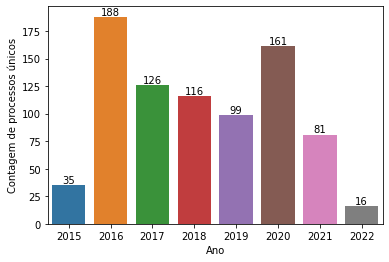

In [40]:
#Plot Contagem de processos por ano
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x ='NRAnoProcesso', data = df_final_concat)
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Contagem de processos únicos')
plt.savefig('count_plot_1402_Ano.png', dpi=300)

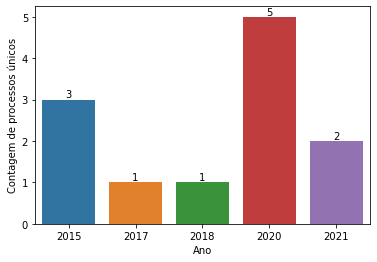

In [41]:
#Plot Contagem de processos por ano
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x ='NRAnoProcesso', data = processos_sem1402_final_concat)
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Contagem de processos únicos')
plt.savefig('count_plot_SEM 1402_ANO.png', dpi=300)

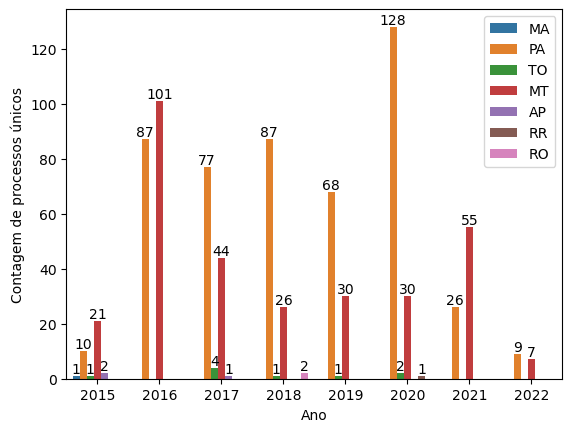

In [34]:
#Plot Contagem de processos por ano e UF
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x ='NRAnoProcesso', data = df_final_concat,hue='UF')
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Contagem de processos únicos')
plt.legend(loc='upper right')
plt.savefig('count_plot_1402_UF.png', dpi=300)


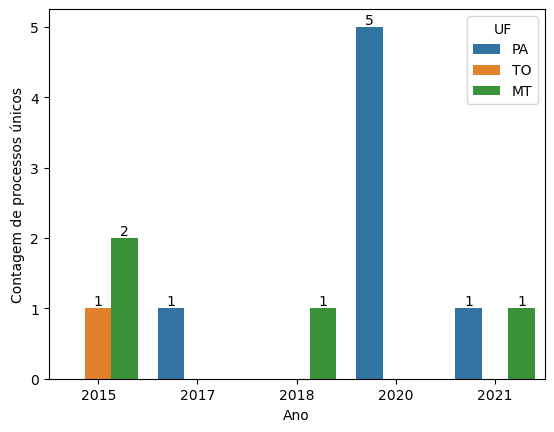

In [36]:
#Plot Contagem de processos por ano e UF
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x ='NRAnoProcesso', data = processos_sem1402_final_concat,hue='UF')
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Contagem de processos únicos')
plt.savefig('count_plot_SEM 1402_UF.png', dpi=300)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


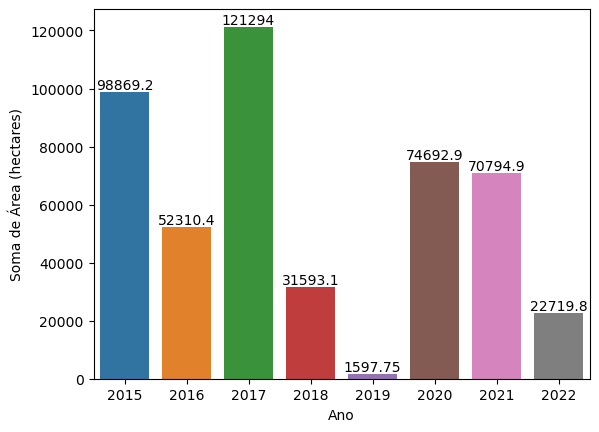

In [65]:
#Plot soma de processo pro ano
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

ax = sns.barplot(df_final_concat.NRAnoProcesso.unique(),
                 df_final_concat.groupby(['NRAnoProcesso'])['QTAreaHA'].sum())

for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Soma de Área (hectares)')
plt.savefig('SUM_plot_1402_ANO.png', dpi=300)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


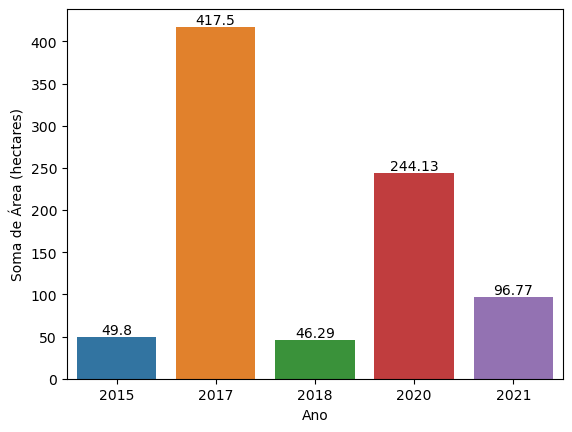

In [100]:
#Plot soma de processo pro ano
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

ax = sns.barplot(processos_sem1402_final_concat.NRAnoProcesso.unique(),
                 processos_sem1402_final_concat.groupby(['NRAnoProcesso'])['QTAreaHA'].sum())

for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Ano', ylabel='Soma de Área (hectares)')
plt.savefig('SUM_plot_SEM_1402_ANO.png', dpi=300)

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.8% of the points cann

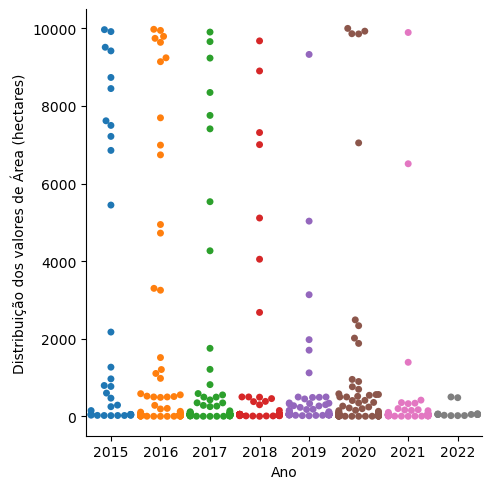

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


ax = sns.catplot(data = df_final_concat,x= 'NRAnoProcesso',y = 'QTAreaHA', kind="swarm")


ax.set(xlabel='Ano', ylabel='Contagem de processos únicos')


ax.set(xlabel='Ano', ylabel='Distribuição dos valores de Área (hectares)')
plt.savefig('DIST_area_plot_1402_ANO.png', dpi=300)

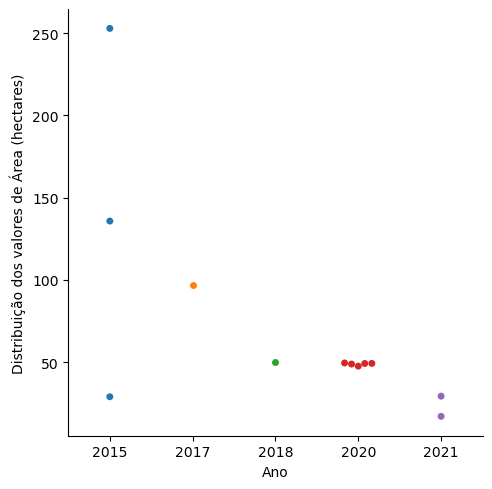

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


ax = sns.catplot(data = processos_sem1402_final_concat,x= 'NRAnoProcesso',y = 'QTAreaHA', kind="swarm")





ax.set(xlabel='Ano', ylabel='Distribuição dos valores de Área (hectares)')
plt.savefig('DIST_area_plot_SEM_1402_ANO.png', dpi=300)

In [108]:
processos_sem1402_final_concat.groupby(['NRAnoProcesso','UF'])['QTAreaHA'].sum().to_frame()

QTAreaHA
NRAnoProcesso UF          
2015          MT    388.58
              TO     28.92
2017          PA     96.77
2018          MT     49.80
2020          PA    244.13
2021          MT     29.27
              PA     17.02

In [132]:
#Calculando os quantis para o df_final_concat
df_final_concat['QTAreaHA'].quantile([0.25,0.50,0.75,0.95,0.90,0.80])

0.25      43.5925
0.50      49.6900
0.75      50.0000
0.95    5027.7740
0.90     541.0180
0.80      99.8980
Name: QTAreaHA, dtype: float64

In [134]:
df_final_concat['QTAreaHA'][df_final_concat['QTAreaHA']>5027.7740].sum()

352878.89

In [105]:
processos_sem1402_final_concat['QTAreaHA'].max()

252.85

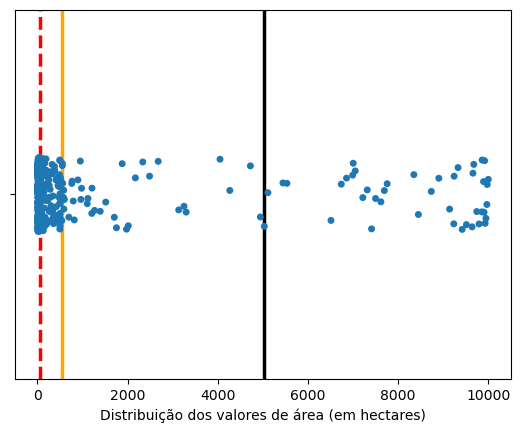

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
ax =sns.stripplot(x=df_final_concat["QTAreaHA"]);
plt.axvline(x=df_final_concat.QTAreaHA.quantile(0.50),
            color='red',ls='--',lw=2.5)
plt.axvline(x=df_final_concat.QTAreaHA.quantile(0.95),
            color='black',lw=2.5)
plt.axvline(x=df_final_concat.QTAreaHA.quantile(0.90),
            color='orange',lw=2.5)
ax.set(xlabel='Distribuição dos valores de área (em hectares)')
plt.savefig('Distribuição_area_1402.png', dpi=300)

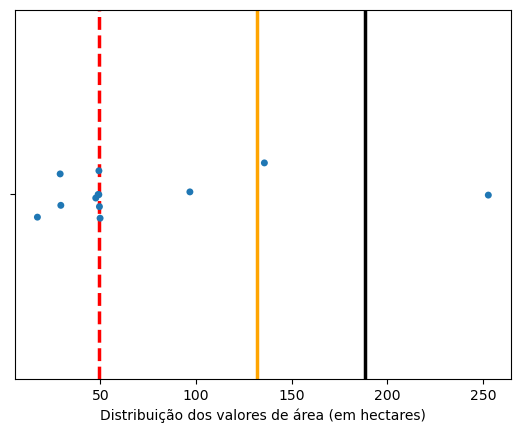

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
ax =sns.stripplot(x=processos_sem1402_final_concat["QTAreaHA"]);
plt.axvline(x=processos_sem1402_final_concat.QTAreaHA.quantile(0.50),
            color='red',ls='--',lw=2.5)
plt.axvline(x=processos_sem1402_final_concat.QTAreaHA.quantile(0.95),
            color='black',lw=2.5)
plt.axvline(x=processos_sem1402_final_concat.QTAreaHA.quantile(0.90),
            color='orange',lw=2.5)
ax.set(xlabel='Distribuição dos valores de área (em hectares)')
plt.savefig('Distribuição_area_SEM1402.png', dpi=300)

In [117]:
df_final_concat.query('UF=="PA"')['QTAreaHA'].quantile([0.25,0.50,0.75,0.95,0.90,0.80])

0.25     46.085
0.50     49.775
0.75     50.000
0.95    562.669
0.90    358.076
0.80     50.000
Name: QTAreaHA, dtype: float64

In [26]:
df_final_concat.query('UF=="PA"')['QTAreaHA'][df_final_concat.query('UF=="PA"')['QTAreaHA']> 562.669].sum()

108358.92

In [130]:
df_final_concat.query('UF=="PA"')['QTAreaHA'].max()

10000.0

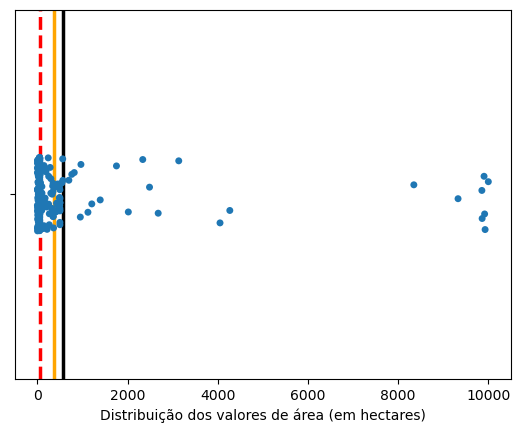

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
ax =sns.stripplot(x=df_final_concat.query('UF=="PA"')["QTAreaHA"]);
plt.axvline(x=df_final_concat.query('UF=="PA"').QTAreaHA.quantile(0.50),
            color='red',ls='--',lw=2.5)
plt.axvline(x=df_final_concat.query('UF=="PA"').QTAreaHA.quantile(0.95),
            color='black',lw=2.5)
plt.axvline(x=df_final_concat.query('UF=="PA"').QTAreaHA.quantile(0.90),
            color='orange',lw=2.5)
ax.set(xlabel='Distribuição dos valores de área (em hectares)')
plt.savefig('Distribuição_area_PARA1042.png', dpi=300)

In [144]:
df_final_concat.query('UF=="MT"')['QTAreaHA'].quantile([0.25,0.50,0.75,0.95,0.90,0.80])

0.25      34.7250
0.50      49.4750
0.75     119.3625
0.95    8549.3905
0.90    5345.8340
0.80     309.4680
Name: QTAreaHA, dtype: float64

In [25]:
df_final_concat.query('UF=="MT"')['QTAreaHA'][df_final_concat.query('UF=="MT"')['QTAreaHA']>8549.3905].sum()

152493.13

In [147]:
df_final_concat.query('UF=="MT"')['QTAreaHA'].max()

9976.49

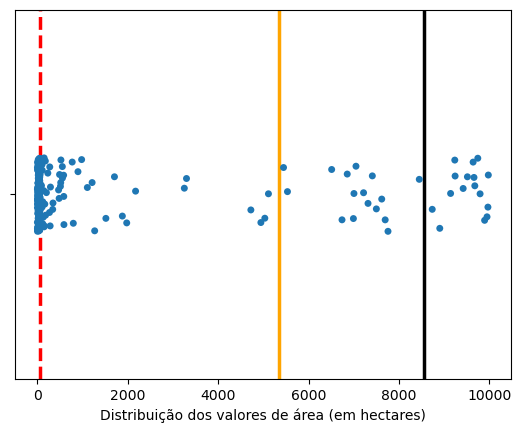

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
ax =sns.stripplot(x=df_final_concat.query('UF=="MT"')["QTAreaHA"]);
plt.axvline(x=df_final_concat.query('UF=="MT"').QTAreaHA.quantile(0.50),
            color='red',ls='--',lw=2.5)
plt.axvline(x=df_final_concat.query('UF=="MT"').QTAreaHA.quantile(0.95),
            color='black',lw=2.5)
plt.axvline(x=df_final_concat.query('UF=="MT"').QTAreaHA.quantile(0.90),
            color='orange',lw=2.5)
ax.set(xlabel='Distribuição dos valores de área (em hectares)')
plt.savefig('Distribuição_area_MT1042.png', dpi=300)

In [27]:
df_final_concat.query('QTAreaHA>5027.7740').groupby('Pessoa_NOME').agg(count_col=pd.NamedAgg(column='UF',aggfunc="count"),sum_col=pd.NamedAgg(column='QTAreaHA',aggfunc="sum"))


,count_col,sum_col
Pessoa_NOME,,
COOPERATIVA DE EXTRACAO MINERAL DE MATO GROSSO,1,5032.13
COOPERATIVA DE EXTRACAO MINERAL DE NOSSA SENHORA DO LIVRAMENTO,1,7315.20
COOPERATIVA DE MINERACAO DOS GARIMPEIROS DE PONTES E LACERDA - COMPEL,1,9677.83
COOPERATIVA DOS GARIMPEIROS DE APIACAS - COOGAP,1,9894.59
COOPERATIVA DOS GARIMPEIROS DO VALE DO RIO PEIXOTO - COOGAVEPE,11,85110.71
COOPERATIVA DOS MINERADORES DE TUCUMA E ALTO XINGU - COOMTAX,1,9905.43
COOPERATIVA MISTA DOS GARIMPEIROS DE PEIXOTO DE AZEVEDO,6,47772.83
COOPERTRANS COOPERATIVA DOS GARIMPEIROS DE MORAES ALMEIDA E TRANSGARIMPEIRA,4,38977.87
Cooperativa de Pequenos Mineradores de Ouro e Pedras Preciosas de Alta Floresta,13,110925.83


# Apos a apresentação para a equipe no escritório, foi acordado que iniciaremos o processo de explorar a quantidade de processos por data dos eventos específicos. Vamos começar pelos 42 mais relevantes

#### Criando funções para calcular o tempo

In [1]:
import sys
from functools import reduce
import time
import pandas as pd
df = pd.read_excel('C:/Users/User/Downloads/DB_AMAZLGL_95%.xlsx')
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
processo_sub = pd.read_table('ProcessoSubstancia.csv', sep=',')
processo = pd.read_table("Processo.csv", sep=',')
evento = pd.read_table("ProcessoEvento.csv", sep=',')
mun = pd.read_table("ProcessoMunicipio.csv", sep=',')
pessoa = pd.read_table("ProcessoPessoa.csv", sep=',')

C:\Users\User\AppData\Local\Temp\ipykernel_10392\2060963971.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pessoa = pd.read_table("ProcessoPessoa.csv", sep=',')


In [3]:
#Criando função para analisar a evolução de todas as fases do processo:
def processos_linha_temmpo(lista_processo:list,new_lista_processo:list):
    pd.options.mode.chained_assignment = None
    for i in range(len(lista_processo)):
        sys.stdout.write("\r"+str(i))
        meu_processo = evento[evento['DSProcesso']==lista_processo[i]]
        meu_processo['DTEvento'] = pd.to_datetime(meu_processo.DTEvento)
        meu_processo = meu_processo.sort_values('DTEvento')
        meu_processo['Tempo_dias'] = meu_processo.DTEvento.diff()
        meu_processo['Tempo_dias'] = meu_processo['Tempo_dias'].fillna(pd.Timedelta(seconds=0))
        new_lista_processo.append(meu_processo)
    df_final = pd.concat(new_lista_processo)
        
    return df_final

In [4]:
new_lista = []
lista_processo = df.DSProcesso.unique().tolist()
linha_tempo_completa = processos_linha_temmpo(lista_processo = lista_processo
                                              ,new_lista_processo = new_lista)
linha_tempo_completa

41

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias
4639014,4639014,850.101/2015,333,2015-02-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days
4639018,4639018,850.101/2015,793,2015-10-28,REQ PLG/DOCUMENTO DIVERSO PROTOCOLIZADO,259 days
4639015,4639015,850.101/2015,345,2016-02-11,REQ PLG/PRORROGAÇÃO PRAZO EXIGÊNCIA SOLICITADO,106 days
4639019,4639019,850.101/2015,793,2016-06-02,REQ PLG/DOCUMENTO DIVERSO PROTOCOLIZADO,112 days
4639023,4639023,850.101/2015,2111,2016-06-16,REQ PLG/PROTOCOLO ORGÃO AMBIENTAL PROTOCOLADO,14 days
...,...,...,...,...,...,...
6528316,6528316,867.141/2021,513,2022-05-19,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,8 days
6543022,6543022,867.239/2021,333,2021-08-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days
6543024,6543024,867.239/2021,793,2021-10-26,REQ PLG/DOCUMENTO DIVERSO PROTOCOLIZADO,56 days
6543025,6543025,867.239/2021,1402,2022-01-05,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,71 days


In [13]:
#Célula para explorar essa linha do tempo:
linha_tempo_completa.query('DSProcesso=="850.101/2015"') #Caso de processo em que é  bem complexo

linha_tempo_completa.query('DSProcesso=="867.239/2021"')#Caso de processo em que é bem simples

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias
6543022,6543022,867.239/2021,333,2021-08-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days
6543024,6543024,867.239/2021,793,2021-10-26,REQ PLG/DOCUMENTO DIVERSO PROTOCOLIZADO,56 days
6543025,6543025,867.239/2021,1402,2022-01-05,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,71 days
6543023,6543023,867.239/2021,513,2022-03-02,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,56 days


In [14]:
#Criando função apenas para analisar o tempo entre o evento 333 - 1402 - 513
def time_line_requerimento_licenca_liberacao (lista_processo:list,new_lista_processo:list):
    pd.options.mode.chained_assignment = None
    for i in range(len(lista_processo)):
        sys.stdout.write("\r"+str(i))
        
        meu_processo = evento[evento['DSProcesso']==lista_processo[i]]
        meu_processo['DTEvento'] = pd.to_datetime(meu_processo.DTEvento)
        meu_processo = meu_processo.sort_values('DTEvento')
        meu_processo = meu_processo.query('IDEvento == 333 | IDEvento ==1402 | IDEvento==513')
        meu_processo.drop_duplicates(subset = 'IDEvento',keep = 'first',inplace=True)
        meu_processo['Tempo_dias'] = meu_processo.DTEvento.diff()
        meu_processo['Tempo_Ano'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'Y')
        meu_processo['Tempo_Mes'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'M')
        meu_processo['Tempo_dias'] = meu_processo['Tempo_dias'].fillna(pd.Timedelta(days=0))        
        new_lista_processo.append(meu_processo)
    df_final= pd.concat(new_lista_processo)
    return df_final


In [15]:
new_lista = []
lista_processo = df.DSProcesso.unique().tolist()
linha_tempo_req_lic_lib = time_line_requerimento_licenca_liberacao(lista_processo = lista_processo,
                                                                   new_lista_processo = new_lista)
linha_tempo_req_lic_lib

41

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes
4639014,4639014,850.101/2015,333,2015-02-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
4639021,4639021,850.101/2015,1402,2019-05-07,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,1546 days,4.232804,50.793651
4639016,4639016,850.101/2015,513,2019-06-12,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,36 days,0.098565,1.182776
4663153,4663153,850.171/2020,333,2020-02-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
4663156,4663156,850.171/2020,1402,2022-01-27,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,700 days,1.916535,22.998419
...,...,...,...,...,...,...,...,...
6528322,6528322,867.141/2021,1402,2022-03-22,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,217 days,0.594126,7.129510
6528316,6528316,867.141/2021,513,2022-05-19,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,58 days,0.158799,1.905583
6543022,6543022,867.239/2021,333,2021-08-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
6543025,6543025,867.239/2021,1402,2022-01-05,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,127 days,0.347714,4.172570


In [17]:
#Célula para explorar essa linha do tempo:
linha_tempo_req_lic_lib.query('DSProcesso=="867.239/2021"')

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes
6543022,6543022,867.239/2021,333,2021-08-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
6543025,6543025,867.239/2021,1402,2022-01-05,REQ PLG/LICENÇA AMBIENTAL PROTOCOLIZADA,127 days,0.347714,4.172570
6543023,6543023,867.239/2021,513,2022-03-02,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,56 days,0.153323,1.839874


In [18]:
#Criando função para calcular o tempo total que leva um processo( quanto tempo demora do evento 333 direto para o 513):
def time_line_requerimento_liberacao (lista_processo:list,new_lista_processo:list):
    pd.options.mode.chained_assignment = None
    for i in range(len(lista_processo)):
        sys.stdout.write("\r"+str(i))
        meu_processo = evento[evento['DSProcesso']==lista_processo[i]]
        meu_processo['DTEvento'] = pd.to_datetime(meu_processo.DTEvento)
        meu_processo = meu_processo.sort_values('DTEvento')
        meu_processo = meu_processo.query('IDEvento == 333  | IDEvento==513')
        meu_processo.drop_duplicates(subset = 'IDEvento',keep = 'first',inplace=True)
        meu_processo['Tempo_dias'] = meu_processo.DTEvento.diff()
        meu_processo['Tempo_Ano'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'Y')
        meu_processo['Tempo_Mes'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'M')
        meu_processo['Tempo_dias'] = meu_processo['Tempo_dias'].fillna(pd.Timedelta(days=0))        
        new_lista_processo.append(meu_processo)
    df_final= pd.concat(new_lista_processo)
    return df_final

In [19]:
new_lista = []
lista_processo = df.DSProcesso.unique().tolist()
requerimento_liberacao= time_line_requerimento_liberacao (lista_processo = lista_processo
                                                          ,new_lista_processo = new_lista)
requerimento_liberacao

41

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes
4639014,4639014,850.101/2015,333,2015-02-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
4639016,4639016,850.101/2015,513,2019-06-12,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1582 days,4.331369,51.976427
4663153,4663153,850.171/2020,333,2020-02-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
4663154,4663154,850.171/2020,513,2022-03-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,749 days,2.050692,24.608308
4663509,4663509,850.172/2020,333,2020-02-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
...,...,...,...,...,...,...,...,...
6491426,6491426,866.932/2016,513,2019-06-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,921 days,2.521612,30.259348
6528315,6528315,867.141/2021,333,2021-08-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
6528316,6528316,867.141/2021,513,2022-05-19,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,275 days,0.752924,9.035093
6543022,6543022,867.239/2021,333,2021-08-31,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN


In [20]:
requerimento_liberacao.query('DSProcesso == "850.101/2015"')

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes
4639014,4639014,850.101/2015,333,2015-02-11,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
4639016,4639016,850.101/2015,513,2019-06-12,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1582 days,4.331369,51.976427


#### Criando datastream para filtrar os bottom 5%. Vamos depois utilizar a função time_line_requerimento_liberacao para calcular quanto tempo demora do 333 direto para o 513

In [21]:
df2 = pd.read_csv('db_333_1402_513_uniMUNI.csv')
df2['Municipios'] = df2['Municipios'].str.title()
df2['QTAreaHA']=df2['QTAreaHA'].str.replace(',', '.').astype(float)
df2['QTAreaHA'].quantile([0.05])
bottom_5 = df2.query('QTAreaHA <11.198')
bottom_5
botton_lista=[]
y = bottom_5.DSProcesso.unique().tolist()
time_line_bottom = time_line_requerimento_liberacao(y,botton_lista)


41

#### Modificando os dados para fazer o teste ANOVA

In [22]:
#Modificando os dados para realizar a ANOVA
bottom = time_line_bottom.groupby('DSProcesso').Tempo_dias.sum().to_frame()
bottom['Type']='bottom5%'
bottom['total_days_td'] = bottom['Tempo_dias'].dt.total_seconds() / (24 * 60 * 60)
bottom.reset_index(inplace=True)
upper = requerimento_liberacao.groupby('DSProcesso').Tempo_dias.sum().to_frame()
upper['Type']='top5%'
upper['total_days_td'] = upper['Tempo_dias'].dt.total_seconds() / (24 * 60 * 60)
upper.reset_index(inplace=True)

df_concat=pd.concat([upper, bottom])
df_concat

,DSProcesso,Tempo_dias,Type,total_days_td
0,850.101/2015,1582 days,top5%,1582.0
1,850.171/2020,749 days,top5%,749.0
2,850.172/2020,749 days,top5%,749.0
3,850.536/2017,155 days,top5%,155.0
4,850.667/2020,630 days,top5%,630.0
...,...,...,...,...
37,866.811/2016,2209 days,bottom5%,2209.0
38,866.953/2018,1029 days,bottom5%,1029.0
39,867.303/2020,517 days,bottom5%,517.0
40,867.304/2020,517 days,bottom5%,517.0


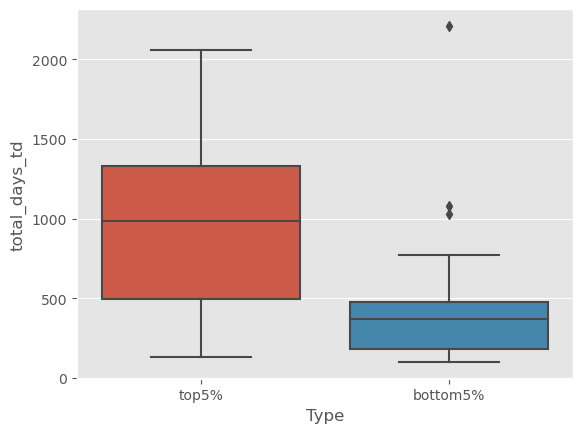

'Leva-se em média 963.38 dias para que os top5 processos cheguem até a permissão de lavra publicada e 411.12 dias para os bottom 5%'

In [25]:
#Plotando os dados de tempo por classe de processo
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

#g= sns.relplot(data=df_concat, x="Type", y="total_days_td", hue="Type")
g = sns.boxplot(data=df_concat, x="Type", y="total_days_td")

plt.show(g)
media_bot5 = df_concat.query('Type=="bottom5%"').total_days_td.mean()
media_top5= df_concat.query('Type=="top5%"').total_days_td.mean()
f'Leva-se em média {round(media_top5,2)} dias para que os top5 processos cheguem até a permissão de lavra publicada e {round(media_bot5,2)} dias para os bottom 5%'

In [26]:
#Anova
#H0 = μ1 = μ2 = μ3 ... = μk -> médias são iguais
#H1 = Médias são diferentes
# F-statistic: Variação entre as médias dos grupos  / Variação dentro das amostras 
# F > 1 -> A variação entre as médias dos grupos é maior que a variação dentro das amostras de cada grupo. Em outras palavras,
# os grupos possuem médias diferentes (rejeita-se a hipótese nula)
#Se p valor for menor que .05, rejeitamos a hipótese nula(médias são diferentes)

import statsmodels.api as sm
from statsmodels.formula.api import ols 
model = ols('total_days_td ~Type',
           data = df_concat).fit()
anova_result = sm.stats.anova_lm(model,typ=2)
print(anova_result)
print(anova_result['PR(>F)']<0.05)

                sum_sq    df          F        PR(>F)
Type      6.404857e+06   1.0  28.455169  8.320336e-07
Residual  1.845704e+07  82.0        NaN           NaN
Type         True
Residual    False
Name: PR(>F), dtype: bool


## Analisando os dados quando quebramos os dias entre os 3 eventos:

In [27]:
# Para os top5%
new_lista = []
lista_processo = df.DSProcesso.unique().tolist()
linha_tempo_req_lic_lib = time_line_requerimento_licenca_liberacao(lista_processo = lista_processo,
                                                                   new_lista_processo = new_lista)
# Para os bottom5%
df2 = pd.read_csv('db_333_1402_513_uniMUNI.csv')
df2['Municipios'] = df2['Municipios'].str.title()
df2['QTAreaHA']=df2['QTAreaHA'].str.replace(',', '.').astype(float)
df2['QTAreaHA'].quantile([0.05])
bottom_5 = df2.query('QTAreaHA <11.198')


botton_lista=[]
y = bottom_5.DSProcesso.unique().tolist()
linha_tempo_req_lic_lib_bottom = time_line_requerimento_licenca_liberacao(lista_processo = y,
                                                                   new_lista_processo = botton_lista)

41

In [29]:
linha_tempo_req_lic_lib_bottom.groupby(['DSProcesso','IDEvento']).Tempo_dias.sum().to_frame()

Tempo_dias
DSProcesso   IDEvento           
850.032/2020 333          0 days
             513         11 days
             1402       150 days
850.033/2020 333          0 days
             513         11 days
...                          ...
867.304/2020 513        177 days
             1402       340 days
886.246/2018 333          0 days
             513        905 days
             1402       173 days

[126 rows x 1 columns]

<AxesSubplot:xlabel='total_days_td', ylabel='Type'>

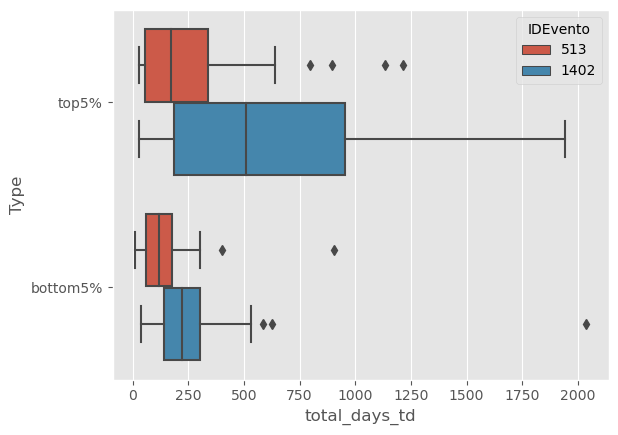

In [30]:
bottom = linha_tempo_req_lic_lib_bottom.groupby(['DSProcesso','IDEvento']).Tempo_dias.sum().to_frame()
bottom['Type']='bottom5%'
bottom['total_days_td'] = bottom['Tempo_dias'].dt.total_seconds() / (24 * 60 * 60)
bottom.reset_index(inplace=True)
upper = linha_tempo_req_lic_lib.groupby(['DSProcesso','IDEvento']).Tempo_dias.sum().to_frame()
upper['Type']='top5%'
upper['total_days_td'] = upper['Tempo_dias'].dt.total_seconds() / (24 * 60 * 60)
upper.reset_index(inplace=True)

df_concat=pd.concat([upper, bottom])
df_concat
delete_333 = df_concat.query('IDEvento == 333')
df_concat_sem333 = df_concat[~df_concat['IDEvento'].isin(delete_333.IDEvento.unique())]

sns.boxplot(data=df_concat_sem333, x="total_days_td", y="Type", hue="IDEvento")

# Analisando o que o Gabriel pediu para fazer (dia 09/05/2023)


Gostaria que você visse pra gente quantas PLGs foram outorgadas no Pará:

- desde 19 de fevereiro de 2021; e

- com área menor ou igual a 500 hectares; e

- sem extrapolar a área de um município; e

- fora de unidades de conservação estaduais e federais, exceto APAs.

In [84]:
#Loading packages
import pandas as pd
path = 'C:\\Users\\napcc\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
para = mun.query('UF=="PA"')
#Pegando processos apenas para ouro
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
substancia
ouro = substancia.query('Substancia.str.contains("OURO")',engine='python')
#Filtrando no df do Para, quais são para substância ouro, baseado no DF de Ouro
para_ouro = para[para['DSProcesso'].isin(ouro['DSProcesso'])]
#Lendo a planilha de eventos e filtrando para os eventos 333 ou 513:
eventos = pd.read_csv(path+'ProcessoEvento.csv')
eventos_333 = eventos.query('IDEvento==333')
eventos_513 = eventos.query("IDEvento==513")
f'Os eventos que nós filtramos são {eventos_333.IDEvento.unique()} e {eventos_513.IDEvento.unique()}'
#Lendo a planilha principal de Processos e dando inner join com a planilha de eventos
processos = pd.read_csv(path+'Processo.csv')
processos_eventos_333 = processos.merge(eventos_333,how='inner',on='DSProcesso')
processos_eventos_333_513 = processos_eventos_333.merge(eventos_513,how='inner',on='DSProcesso')

#Filtrando os processo em processos_eventos_333_513 que são para o Para e para ouro
processos_eventos_333_513_para_ouro = processos_eventos_333_513[processos_eventos_333_513['DSProcesso'].isin(para_ouro['DSProcesso'])]
processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
#Lendo a planilha de Processos Pessoa e unindo ela ao nosso DF principal
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoa,how='inner',on='DSProcesso')
processos_eventos_333_513_para_ouro_pessoa.drop_duplicates('DSProcesso',keep = 'last',inplace=True)
#Passando a coluna de Área para numérico:
processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'] = processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'].str.replace(',', '.').astype(float)
#Criando coluna de Data para o evento 513 e 333
processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_y)
processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_x)
#Selecionando as colunas que queremos:
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.loc[:,~processos_eventos_333_513_para_ouro_pessoa.columns.duplicated()].copy()
columns_keep = ['DSProcesso','BTAtivo','QTAreaHA','Tipo_Requerimento','IDEvento_x','Evento__x',
                'Evento_333_Date','IDEvento_y','Evento__y','Evento_513_Date','Pessoa','Pessoa_NOME','TipoRelacao']
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.filter(items = columns_keep).copy()
#Filtrando para os processos que o evento 513 ocorreu no dia 19 de fevereiro de 2021 ou depois
processos_data = processos_eventos_333_513_para_ouro_pessoa[processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date']>= '2021-02-19']
processos_data

#filtrando para processos com área menor igual 500 ha
processos_data_area = processos_data[processos_data['QTAreaHA']<= 500]
processos_data_area.to_excel('C:\\Users\\napcc\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Produtos\\Processos

C:\Users\User\AppData\Local\Temp\ipykernel_4016\2384970815.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processo_para_ouro_333_513_clean_fev19['QTAreaHA'] = processo_para_ouro_333_513_clean_fev19['QTAreaHA'].str.replace(',', '.').astype(float)
